#**Project Overview: Uncorked Insights - Wine Quality Analysis**

##**Objective:**

  * To understand the factors influencing red and white wine quality by analyzing physicochemical properties and employing statistical and machine learning techniques.

##**Methodology:**

  * **Data Acquisition:** Two datasets were utilized, encompassing 1599 red wine and 4898 white wine samples, each containing 11 physicochemical attributes and a quality rating (0-10).

  * **Exploratory Data Analysis (EDA):** Descriptive statistics, t-tests, and confidence intervals were computed for key variables to understand central tendencies, dispersion, and differences between high and low-quality wines.
  
  * **Inferential Statistics:** Confidence intervals were calculated for key variables to estimate population parameters and identify potential ranges associated with high-quality wine.
  
  * **Logistic Regression Analysis:** Logistic regression models were developed to predict wine quality (high or low) based on physicochemical properties. Odds ratios were calculated to assess the impact of each variable on wine quality.

##**Key Findings:**

###**Descriptive Statistics and Inferential Statistics:**

  * **Red Wine:** Confidence intervals indicated that higher levels of alcohol, sulphates, and citric acid, and lower levels of volatile activity and chlorides were associated with higher quality red wine (6-8 rating).

  * **White Wine:** Confidence intervals indicated that higher levels of alcohol, free sulfur dioxide, and sulphates, and lower levels of volatile activity, density, and chlorides were associated with higher quality white wine (7-9 rating).

###**Logistic Regression:**

  * Both red and white wine models exhibited significant predictive power, as indicated by low LLR p-values.

  * Higher levels of sulphates and alcohol generally correlate with higher quality wine for both red and white varieties.

  * Higher levels of volatile acidity and chlorides are associated with lower quality wine for both red and white varieties.

  * The impact of citric acid, fixed acidity, residual sugar, total sulfur dioxide, and pH on wine quality was negligible for both red and white wines.

  * Density exhibited an extremely low odds ratio for both red and white wines, suggesting potential data or model issues.

##**Recommendations:**

  * Conduct further analysis on the density variable to identify potential anomalies or model misspecifications.

  * Explore feature engineering and selection techniques to optimize model performance.
  
  * Compare the logistic regression model with other classification algorithms (e.g., random forest, support vector machines) to identify potential improvements.
  
  * Investigate potential interactions between variables to enhance model predictive power.
  
  * Collaborate with wine experts to incorporate domain knowledge and identify additional relevant factors.

##**Conclusion:**

  * This analysis provides foundational insights into the factors influencing red and white wine quality. However, further research is necessary to develop a more comprehensive understanding and improve predictive accuracy.

# Project 1: Uncorked Insights

## Red Wine Quality Analysis
  * Descriptive Statistics
    * Dataset details
    * Central Tendency
    * Dispersion
  * Inferential Statistics:
    * High Quality Red Wine (6-8 rating)
      * T-tests
      * Confidence Intervals (CI)
      * Logistic Regression Analysis
   

## White Wine Quality Analysis
  * Descriptive Statistics
      * Dataset details
      * Central Tendency
      * Dispersion
  * Inferential Statistics:
    * High Quality White Wine (7-9 rating)
      * T-tests
      * Confidence Intervals (CI)
      * Logistic Regression Analysis
  

# Red Wine Quality Analysis:

## Descriptive Statistics

In [ ]:
import pandas as pd
import numpy as np

# Red Wine Data Set
df_red = pd.read_csv('red_wine.csv')
df_red.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Red Wine DataFrame Information
print(df_red.info())
print('\nRows and Cols')
print(df_red.shape)
print('\nRed Wine Summary Statistics\n')
print(df_red.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fixedacidity        1599 non-null   float64
 1   volatileacidity     1599 non-null   float64
 2   citricacid          1599 non-null   float64
 3   residualsugar       1599 non-null   float64
 4   chlorides           1599 non-null   float64
 5   freesulfurdioxide   1599 non-null   float64
 6   totalsulfurdioxide  1599 non-null   float64
 7   density             1599 non-null   float64
 8   pH                  1599 non-null   float64
 9   sulphates           1599 non-null   float64
 10  alcohol             1599 non-null   float64
 11  quality             1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

Rows and Cols
(1599, 12)

Red Wine Summary Statistics

       fixedacidity  volatileacidity   citricacid  residualsugar    chlorides  \
count   1599

In [ ]:
# Confirm no missing values
df_red.isna().sum()

,0
fixedacidity,0
volatileacidity,0
citricacid,0
residualsugar,0
chlorides,0
freesulfurdioxide,0
totalsulfurdioxide,0
density,0
pH,0
sulphates,0


In [ ]:
# Trim spaces by using the rename method for column names

df_red = df_red.rename(columns=({' fixed acidity ': 'fixed_acidity', ' volatile acidity ': 'volatile_activity',
                                 ' citric acid ': 'citric_acid', ' residual sugar ': 'residual_sugar',
                                 ' chlorides ': 'chlorides', ' free sulfur dioxide ': 'free_sulfur_dioxide',
                                 ' total sulfur dioxide ': 'total_sulfur_dioxide', ' density ': 'density',
                                 ' pH ': 'pH', ' sulphates ': 'sulphates', ' alcohol ': 'alcohol',
                                 ' quality ': 'quality'}))


df_red.columns


Index(['fixedacidity', 'volatileacidity', 'citricacid', 'residualsugar',
       'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
# Change to snake case
df_red = df_red.rename(columns=({'fixedacidity': 'fixed_acidity', 'volatileacidity': 'volatile_activity',
                                 'citricacid': 'citric_acid', 'residualsugar': 'residual_sugar',
                                 'chlorides': 'chlorides', 'freesulfurdioxide': 'free_sulfur_dioxide',
                                 'totalsulfurdioxide': 'total_sulfur_dioxide', 'density': 'density',
                                 'pH': 'pH', 'sulphates': 'sulphates', 'alcohol': 'alcohol',
                                 'quality': 'quality'}))


In [ ]:
# Confirm changes

print('Column Names: ')
print(df_red.columns)
print()
# Check datatpyes

print('Data Types: ')
print(df_red.dtypes)

Column Names: 
Index(['fixed_acidity', 'volatile_activity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Data Types: 
fixed_acidity           float64
volatile_activity       float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [ ]:
# Measure of Central Tendancy
print('Mean: ')
print(df_red.mean())
print()
print('Median: ')
print(df_red.median())
print()
print('Mode: ')
print(df_red.mode())
print()


Mean: 
fixed_acidity            8.319637
volatile_activity        0.527821
citric_acid              0.270976
residual_sugar           2.538806
chlorides                0.087467
free_sulfur_dioxide     15.874922
total_sulfur_dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

Median: 
fixed_acidity            7.90000
volatile_activity        0.52000
citric_acid              0.26000
residual_sugar           2.20000
chlorides                0.07900
free_sulfur_dioxide     14.00000
total_sulfur_dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
quality                  6.00000
dtype: float64

Mode: 
   fixed_acidity  volatile_activity  citric_acid  residual_sugar  chlorides  \
0            7.2                0.6          0.0             2

In [ ]:
# Measures of Dispersion
print('Variance: ')
print(df_red.var())

print('\nStandard Deviation: ')
print(np.std(df_red))



Variance: 
fixed_acidity              3.031416
volatile_activity          0.032062
citric_acid                0.037947
residual_sugar             1.987897
chlorides                  0.002215
free_sulfur_dioxide      109.414884
total_sulfur_dioxide    1082.102373
density                    0.000004
pH                         0.023835
sulphates                  0.028733
alcohol                    1.135647
quality                    0.652168
dtype: float64

Standard Deviation: 
fixed_acidity            1.740552
volatile_activity        0.179004
citric_acid              0.194740
residual_sugar           1.409487
chlorides                0.047051
free_sulfur_dioxide     10.456886
total_sulfur_dioxide    32.885037
density                  0.001887
pH                       0.154338
sulphates                0.169454
alcohol                  1.065334
quality                  0.807317
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


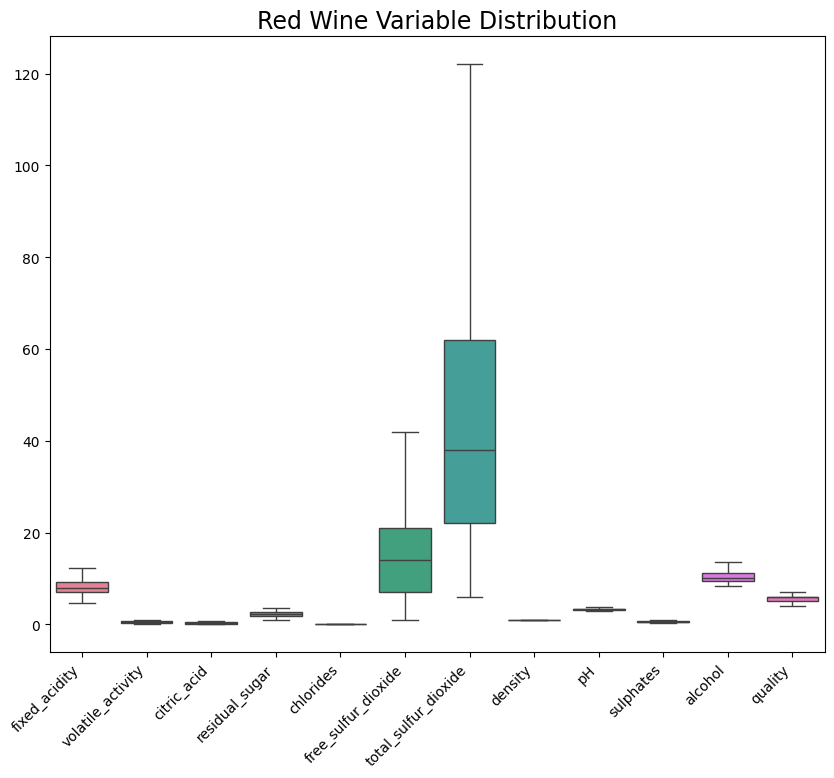

In [ ]:
# Check variable distribution

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.boxplot(df_red, showfliers=False)
plt.title('Red Wine Variable Distribution', fontsize=17)
plt.xticks(horizontalalignment='right', rotation=45)
plt.show()

In [ ]:
# Check Summary Stastistics for each variable
# When reading this chart, under the variable name is the actual value;
# the associated mean and quartiles are related to quality

print('\nFixed Acidity vs Quality Summary Statistics\n')
print(df_red.groupby('fixed_acidity')['quality'].describe())
print('\nVolatile Activity vs Quality Summary Statistics\n')
print(df_red.groupby('volatile_activity')['quality'].describe())
print('\nCitric Acid vs Quality Summary Statistics\n')
print(df_red.groupby('citric_acid')['quality'].describe())
print('\nResidual Sugar vs Quality Summary Statistics\n')
print(df_red.groupby('residual_sugar')['quality'].describe())
print('\nChlorides vs Quality Summary Statistics\n')
print(df_red.groupby('chlorides')['quality'].describe())
print('\nFree Sulfur Dioxide vs Quality Summary Statistics \n')
print(df_red.groupby('free_sulfur_dioxide')['quality'].describe())
print('\nTotal Sulfur Dioxide vs Quality Summary Statistics \n')
print(df_red.groupby('total_sulfur_dioxide')['quality'].describe())
print('\nDensity vs Quality Summary Statistics \n')
print(df_red.groupby('density')['quality'].describe())
print('\npH vs Quality Summary Statistics \n')
print(df_red.groupby('pH')['quality'].describe())
print('\nSulphates vs Quality Summary Statistics \n')
print(df_red.groupby('sulphates')['quality'].describe())
print('\nAlcohol vs Quality Summary Statistics \n')
print(df_red.groupby('alcohol')['quality'].describe())



Fixed Acidity vs Quality Summary Statistics

               count      mean       std  min   25%  50%  75%  max
fixed_acidity                                                     
4.6              1.0  4.000000       NaN  4.0  4.00  4.0  4.0  4.0
4.7              1.0  6.000000       NaN  6.0  6.00  6.0  6.0  6.0
4.9              1.0  7.000000       NaN  7.0  7.00  7.0  7.0  7.0
5.0              6.0  5.833333  1.329160  4.0  5.25  6.0  6.0  8.0
5.1              4.0  6.750000  0.500000  6.0  6.75  7.0  7.0  7.0
...              ...       ...       ...  ...   ...  ...  ...  ...
14.3             1.0  6.000000       NaN  6.0  6.00  6.0  6.0  6.0
15.0             2.0  7.000000  0.000000  7.0  7.00  7.0  7.0  7.0
15.5             2.0  5.000000  0.000000  5.0  5.00  5.0  5.0  5.0
15.6             2.0  6.000000  1.414214  5.0  5.50  6.0  6.5  7.0
15.9             1.0  5.000000       NaN  5.0  5.00  5.0  5.0  5.0

[96 rows x 8 columns]

Volatile Activity vs Quality Summary Statistics

          

In [ ]:
# Checking each variable's value count in relation to quality
# These tables are read variable name > value, quality > value, count for each given pair

print('\nFixed Acidity vs Quality Value Count\n')
print(df_red.groupby('fixed_acidity')['quality'].value_counts(normalize=True).sort_values(ascending=True))
print('\nVolatile Activity vs Quality Value Count\n')
print(df_red.groupby('volatile_activity')['quality'].value_counts(normalize=True).sort_values(ascending=False))
print('\nCitric Acid vs Quality Value Count\n')
print(df_red.groupby('citric_acid')['quality'].value_counts(normalize=True).sort_values(ascending=False))
print('\nResidual Sugar vs Quality Value Count\n')
print(df_red.groupby('residual_sugar')['quality'].value_counts(normalize=True).sort_values(ascending=False))
print('\nChlorides vs Quality Value Count\n')
print(df_red.groupby('chlorides')['quality'].value_counts(normalize=True).sort_values(ascending=False))
print('\nFree Sulfur Dioxide vs Quality Value Count \n')
print(df_red.groupby('free_sulfur_dioxide')['quality'].value_counts(normalize=True).sort_values(ascending=False))
print('\nTotal Sulfur Dioxide vs Quality Value Count \n')
print(df_red.groupby('total_sulfur_dioxide')['quality'].value_counts(normalize=True).sort_values(ascending=False))
print('\nDensity vs Quality Value Count \n')
print(df_red.groupby('density')['quality'].value_counts(normalize=True).sort_values(ascending=False))
print('\npH vs Quality Value Count \n')
print(df_red.groupby('pH')['quality'].value_counts(normalize=True).sort_values(ascending=False))
print('\nSulphates vs Quality Value Count \n')
print(df_red.groupby('sulphates')['quality'].value_counts(normalize=True).sort_values(ascending=False))
print('\nAlcohol vs Quality Value Count \n')
print(df_red.groupby('alcohol')['quality'].value_counts(normalize=True).sort_values(ascending=False))





Fixed Acidity vs Quality Value Count

fixed_acidity  quality
7.2            4          0.014925
7.1            3          0.017544
7.8            8          0.018868
7.0            4          0.020000
7.6            4          0.021739
                            ...   
5.5            8          1.000000
4.9            7          1.000000
4.7            6          1.000000
13.7           6          1.000000
15.9           5          1.000000
Name: proportion, Length: 284, dtype: float64

Volatile Activity vs Quality Value Count

volatile_activity  quality
0.120              7          1.000000
0.895              6          1.000000
0.865              6          1.000000
0.855              6          1.000000
0.845              4          1.000000
                                ...   
0.400              4          0.027027
0.360              8          0.026316
0.580              3          0.026316
0.500              4          0.021739
0.600              7          0.021277
Name: pr

Text(0.5, 0, 'Quality')

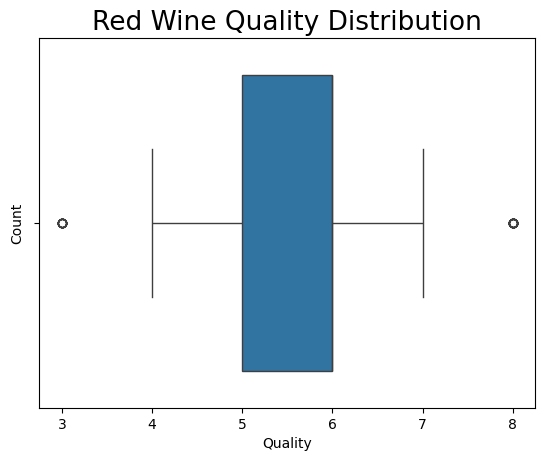

In [ ]:
# Checking the distribution of the target variable 'Quality'
sns.boxplot(x=df_red.quality)
plt.title('Red Wine Quality Distribution', fontsize=19)
plt.ylabel('Count')
plt.xlabel('Quality')

Text(0.5, 0, 'Quality')

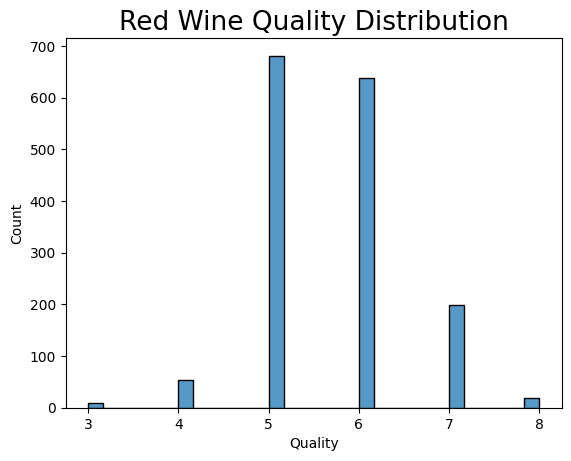

In [ ]:
# Checking the distribution of the target variable 'Quality'
sns.histplot(x=df_red.quality)
plt.title('Red Wine Quality Distribution', fontsize=19)
plt.ylabel('Count')
plt.xlabel('Quality')

# Inferential Statistics:

## High Quality Red Wine Analysis:
  * Creating a subset of data based on (6-8 ratings)
  * This was done to isolate the segment/subset of variables that result in "high" quality wines

In [ ]:
# Impute 6-8 to High Quality categorical value

df_red['high_qual'] = df_red['quality'].isin([8, 7, 6])

# Confirm the value counts of the new variable
print(df_red['high_qual'].value_counts())
print()

# Create a boolean mask
high_qual = df_red['high_qual']
high_qual = df_red[high_qual]

high_qual['quality'].value_counts()


high_qual
True     855
False    744
Name: count, dtype: int64



,count
quality,
6,638
7,199
8,18


In [ ]:
# High Quality Correlation

red_corr_high = high_qual.corr()
print('\nHigh Quality Red Wine Correlations Sorted: \n')
print(red_corr_high['quality'].sort_values(ascending=False))



High Quality Red Wine Correlations Sorted: 

quality                 1.000000
alcohol                 0.357849
citric_acid             0.217669
sulphates               0.189621
fixed_acidity           0.105616
residual_sugar          0.063937
free_sulfur_dioxide    -0.074986
pH                     -0.085086
total_sulfur_dioxide   -0.093926
chlorides              -0.109973
density                -0.135108
volatile_activity      -0.232365
high_qual                    NaN
Name: quality, dtype: float64


Text(0.5, 1.0, 'High Quality Red Wine Correlation Matrix')

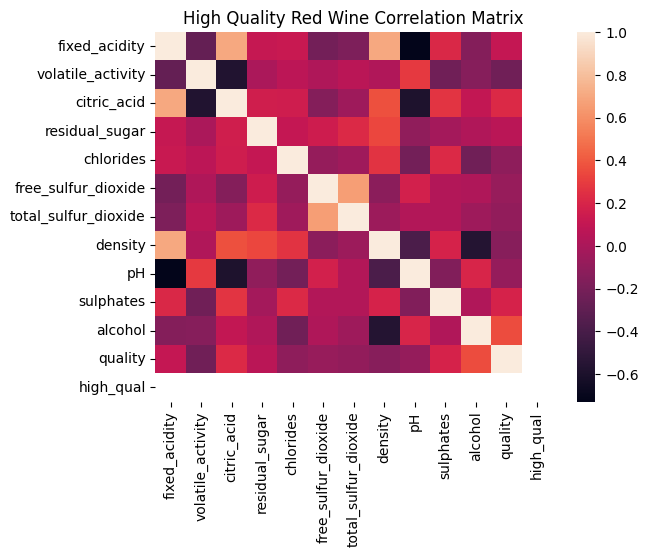

In [ ]:
# Plot Correlation Matrix to provide a different perspective
sns.heatmap(red_corr_high)
plt.title('High Quality Red Wine Correlation Matrix')

## Top 3 Positive & Negative Correlated Variables:

### **Positive** Correlated Variables:
  * Alcohol
  * Citric Acid
  * Sulphates

### **Negative** Correlated Variables:
  * Volatile Activity
  * Density
  * Chlorides


In [ ]:
# Import libraries for Ttest

from scipy.stats import ttest_ind

# Creating variables to conduct Ttests against Quality
# These Ttest will be conducted to confirm whether the 6 variables above have a statsitically significant
#   relationship with 'high quality' Red Wine

fixed_acidity = high_qual[['fixed_acidity']]
volatile_activity = high_qual[['volatile_activity']]
citric_acid = high_qual[['citric_acid']]
residual_sugar = high_qual[['residual_sugar']]
chlorides = high_qual[['chlorides']]
free_sulfur_dioxide = high_qual[['free_sulfur_dioxide']]
total_sulfur_dioxide = high_qual[['total_sulfur_dioxide']]
density = high_qual[['density']]
pH = high_qual[['pH']]
sulphates = high_qual[['sulphates']]
alcohol = high_qual[['alcohol']]


In [ ]:
# Alcohol is the highest positive correlation with Red Wine Quality ratings
# The following Ttests will test Alcohol against the other variables

t_stats, p_value = ttest_ind(alcohol, fixed_acidity)
print('\nAlcohol vs Fixed Acidity')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Alcohol and Fixed Acidity.
# Ha: There is a difference in Red Wine Quality due to Alcohol and Fixed Acidity.
# Based on the T-Stat (32.13) and p-value (1.26e-177) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(alcohol, citric_acid)
print('\nAlcohol vs Citric Acid')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Alcohol and Citric Acid.
# Ha: There is a difference in Red Wine Quality due to Alcohol and Citric Acid.
# Based on the T-Stat (274.58) and p-value (0) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(alcohol, volatile_activity)
print('\nAlcohol vs Volatile Activity')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Density and Volatile Activity.
# Ha: There is a difference in Red Wine Quality due to Density and Volatile Activity.
# Based on the T-Stat (271.52) and p-value (0) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(alcohol, residual_sugar)
print('\nAlcohol vs Residual Sugar')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Alcohol and Residual Sugar.
# Ha: There is a difference in Red Wine Quality due to Alcohol and Residual Sugar.
# Based on the T-Stat (134.85) and p-value (0) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(alcohol, chlorides)
print('\nAlcohol vs Chlorides')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Alcohol and Chlorides.
# Ha: There is a difference in Red Wine Quality due to Alcohol and Chlorides.
# Based on the T-Stat (284.60) and p-value (0) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(alcohol, free_sulfur_dioxide)
print('\nAlcohol vs Free Sulfur Dioxide')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Alcohol and Free Sulfur Dioxide.
# Ha: There is a difference in Red Wine Quality due to Alcohol and Free Sulfur Dioxide.
# Based on the T-Stat (-12.78) and p-value (7.77e-36) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(alcohol, total_sulfur_dioxide)
print('\nAlcohol vs Total Sulfur Dioxide')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Alcohol and Total Sulfur Dioxide.
# Ha: There is a difference in Red Wine Quality due to Alcohol and Total Sulfur Dioxide.
# Based on the T-Stat (-30.54) and p-value (6.69e-164) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(alcohol, pH)
print('\nAlcohol vs pH')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Alcohol and pH.
# Ha: There is a difference in Red Wine Quality due to Alcohol and pH.
# Based on the T-Stat (197.51) and p-value (0) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(alcohol, sulphates)
print('\nAlcohol vs Sulphates')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Alcohol and Sulphates.
# Ha: There is a difference in Red Wine Quality due to Alcohol and Sulphates.
# Based on the T-Stat (266.02) and p-value (0) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(alcohol, density)
print('\nAlcohol vs Density')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Acohol and Density.
# Ha: There is a difference in Red Wine Quality due to Alcohol and Density.
# Based on the T-Stat (260.61) and p-value (0) there is a significant statistical difference
# between the two means



Alcohol vs Fixed Acidity

T-Statistics: [32.13614721], p-value:[1.26982933e-177]

Alcohol vs Citric Acid

T-Statistics: [274.58142375], p-value:[0.]

Alcohol vs Volatile Activity

T-Statistics: [271.52556314], p-value:[0.]

Alcohol vs Residual Sugar

T-Statistics: [134.85694992], p-value:[0.]

Alcohol vs Chlorides

T-Statistics: [284.60987701], p-value:[0.]

Alcohol vs Free Sulfur Dioxide

T-Statistics: [-12.78990095], p-value:[7.77346843e-36]

Alcohol vs Total Sulfur Dioxide

T-Statistics: [-30.54965374], p-value:[6.6986157e-164]

Alcohol vs pH

T-Statistics: [197.51962148], p-value:[0.]

Alcohol vs Sulphates

T-Statistics: [266.02889944], p-value:[0.]

Alcohol vs Density

T-Statistics: [260.61406507], p-value:[0.]


In [ ]:
# Citric Acid is the second highest positive correlation with Red Wine Quality ratings
# The following Ttests will test Citric Acid against the other variables

t_stats, p_value = ttest_ind(citric_acid, fixed_acidity)
print('\nCitric Acid vs Fixed Acidity')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Citric Acid and Fixed Acidity.
# Ha: There is a difference in Red Wine Quality due to Citric Acid and Fixed Acidity.
# Based on the T-Stat (-127.57) and p-value (0) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(citric_acid, alcohol)
print('\nCitric Acid vs Alcohol')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Citric Acid and Alcohol.
# Ha: There is a difference in Red Wine Quality due to Citric Acid and Alcohol.
# Based on the T-Stat (-274.58) and p-value (0) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(citric_acid, volatile_activity)
print('\nCitric Acid vs Volatile Activity')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Citric Acid and Volatile Activity.
# Ha: There is a difference in Red Wine Quality due to Citric Acid and Volatile Activity.
# Based on the T-Stat (-19.80) and p-value (9.55e-79) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(citric_acid, residual_sugar)
print('\nCitric Acid vs Residual Sugar')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Citric Acid and Residual Sugar.
# Ha: There is a difference in Red Wine Quality due to Citric Acid and Residual Sugar.
# Based on the T-Stat (-45.44) and p-value (2.86e-296) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(citric_acid, chlorides)
print('\nCitric Acid vs Chlorides')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Citric Acid and Chlorides.
# Ha: There is a difference in Red Wine Quality due to Citric Acid and Chlorides.
# Based on the T-Stat (31.23) and p-value (7.86e-170) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(citric_acid, free_sulfur_dioxide)
print('\nCitric Acid vs Free Sulfur Dioxide')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Citric Acid and Free Sulfur Dioxide.
# Ha: There is a difference in Red Wine Quality due to Citric Acid and Free Sulfur Dioxide.
# Based on the T-Stat (-43.60) and p-value (8.52e-280) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(citric_acid, total_sulfur_dioxide)
print('\nCitric Acid vs Total Sulfur Dioxide')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Citric Acid and Total Sulfur Dioxide.
# Ha: There is a difference in Red Wine Quality due to Citric Acid and Total Sulfur Dioxide.
# Based on the T-Stat (-41.89) and p-value (1.71e-264) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(citric_acid, pH)
print('\nCitric Acid vs pH')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Citric Acid and pH.
# Ha: There is a difference in Red Wine Quality due to Citric Acid and pH.
# Based on the T-Stat (-348.42) and p-value (0) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(citric_acid, sulphates)
print('\nCitric Acid vs Sulphates')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Citric Acid and Sulphates.
# Ha: There is a difference in Red Wine Quality due to Citric Acid and Sulphates.
# Based on the T-Stat (-45.33) and p-value (2.46e-295) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(citric_acid, density)
print('\nCitric Acid vs Density')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Citric Acid and Density.
# Ha: There is a difference in Red Wine Quality due to Citric Acid and Density.
# Based on the T-Stat (-101.89) and p-value (0) there is a significant statistical difference
# between the two means



Citric Acid vs Fixed Acidity

T-Statistics: [-127.57768147], p-value:[0.]

Citric Acid vs Alcohol

T-Statistics: [-274.58142375], p-value:[0.]

Citric Acid vs Volatile Activity

T-Statistics: [-19.80441787], p-value:[9.55651139e-79]

Citric Acid vs Residual Sugar

T-Statistics: [-45.44374269], p-value:[2.86588362e-296]

Citric Acid vs Chlorides

T-Statistics: [31.23796609], p-value:[7.86029313e-170]

Citric Acid vs Free Sulfur Dioxide

T-Statistics: [-43.60382934], p-value:[8.52366388e-280]

Citric Acid vs Total Sulfur Dioxide

T-Statistics: [-41.89842557], p-value:[1.71378823e-264]

Citric Acid vs pH

T-Statistics: [-348.42148327], p-value:[0.]

Citric Acid vs Sulphates

T-Statistics: [-45.33917454], p-value:[2.46615212e-295]

Citric Acid vs Density

T-Statistics: [-101.89311702], p-value:[0.]


In [ ]:
# Sulphates is the third highest positive correlation with Red Wine Quality ratings
# The following Ttests will test Sulphates against the other variables

t_stats, p_value = ttest_ind(sulphates, fixed_acidity)
print('\nSulphates vs Fixed Acidity')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Sulphates and Fixed Acidity.
# Ha: There is a difference in Red Wine Quality due to Sulphates and Fixed Acidity.
# Based on the T-Stat (-121.72) and p-value (0) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(sulphates, alcohol)
print('\nSulphates vs Alcohol')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Sulphates and Alcohol.
# Ha: There is a difference in Red Wine Quality due to Sulphates and Alcohol.
# Based on the T-Stat (-266.02) and p-value (5.19e-146) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(sulphates, volatile_activity)
print('\nSulphates vs Volatile Activity')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Sulphates and Volatile Activity.
# Ha: There is a difference in Red Wine Quality due to Sulphates and Volatile Activity.
# Based on the T-Stat (-37.60) and p-value (5.43e-226) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(sulphates, residual_sugar)
print('\nSulphates vs Residual Sugar')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Sulphates and Residual Sugar.
# Ha: There is a difference in Red Wine Quality due to Sulphates and Residual Sugar.
# Based on the T-Stat (111.50) and p-value (0) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(sulphates, chlorides)
print('\nSulphates vs Chlorides')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Sulphates and Chlorides.
# Ha: There is a difference in Red Wine Quality due to Sulphates and Chlorides.
# Based on the T-Stat (-42.46) and p-value (1.45e-269) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(sulphates, free_sulfur_dioxide)
print('\nSulphates vs Free Sulfur Dioxide')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Sulphates and Free Sulfur Dioxide.
# Ha: There is a difference in Red Wine Quality due to Sulphates and Free Sulfur Dioxide.
# Based on the T-Stat (-41.47) and p-value (1.03e-260) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(sulphates, total_sulfur_dioxide)
print('\nSulphates vs Total Sulfur Dioxide')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Sulphates and Total Sulfur Dioxide.
# Ha: There is a difference in Red Wine Quality due to Sulphates and Total Sulfur Dioxide.
# Based on the T-Stat (-349.10) and p-value (0) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(sulphates, pH)
print('\nSulphates vs pH')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Sulphates and pH.
# Ha: There is a difference in Red Wine Quality due to Sulphates and pH.
# Based on the T-Stat (-349.10) and p-value (0) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(sulphates, citric_acid)
print('\nSulphates vs Citric Acid')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Sulphates and Citric Acid.
# Ha: There is a difference in Red Wine Quality due to Sulphates and Citric Acid.
# Based on the T-Stat (45.33) and p-value (2.46e-295) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(sulphates, density)
print('\nSulphates vs Density')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Sulphates and Density.
# Ha: There is a difference in Red Wine Quality due to Sulphates and Density.
# Based on the T-Stat (-57.10) and p-value (0) there is a significant statistical difference
# between the two means



Sulphates vs Fixed Acidity

T-Statistics: [-121.72158905], p-value:[0.]

Sulphates vs Alcohol

T-Statistics: [-266.02889944], p-value:[0.]

Sulphates vs Volatile Activity

T-Statistics: [28.44368355], p-value:[5.19485492e-146]

Sulphates vs Residual Sugar

T-Statistics: [-37.60557404], p-value:[5.43197187e-226]

Sulphates vs Chlorides

T-Statistics: [111.50094883], p-value:[0.]

Sulphates vs Free Sulfur Dioxide

T-Statistics: [-42.46340586], p-value:[1.45189085e-269]

Sulphates vs Total Sulfur Dioxide

T-Statistics: [-41.4775046], p-value:[1.03137925e-260]

Sulphates vs pH

T-Statistics: [-349.10117153], p-value:[0.]

Sulphates vs Citric Acid

T-Statistics: [45.33917454], p-value:[2.46615212e-295]

Sulphates vs Density

T-Statistics: [-57.10932999], p-value:[0.]


In [ ]:
# Volatile Activity is the highest negative correlation with Red Wine Quality ratings
# The following Ttests will test Volatile Activity against the other variables

t_stats, p_value = ttest_ind(volatile_activity, fixed_acidity)
print('\nVolatile Activity vs Fixed Acidity')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Volatile Activity and Fixed Acidity.
# Ha: There is a difference in Red Wine Quality due to Volatile Activity and Fixed Acidity.
# Based on the T-Stat (-125.10) and p-value (0) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(volatile_activity, alcohol)
print('\nVolatile Activity vs Alcohol')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Volatile Activity and Alcohol.
# Ha: There is a difference in Red Wine Quality due to Volatile Activity and Alcohol.
# Based on the T-Stat (-271.52) and p-value (0) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(volatile_activity, sulphates)
print('\nVolatile Activity vs Sulphates')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Volatile Activity and Sulphates.
# Ha: There is a difference in Red Wine Quality due to Volatile Activity and Sulphates.
# Based on the T-Stat (-28.44) and p-value (5.19e-146) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(volatile_activity, residual_sugar)
print('\nVolatile Activity vs Residual Sugar')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Volatile Activity and Residual Sugar.
# Ha: There is a difference in Red Wine Quality due to Volatile Activity and Residual Sugar.
# Based on the T-Stat (-42.04) and p-value (8.86e-266) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(volatile_activity, chlorides)
print('\nVolatile Activity vs Chlorides')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Volatile Activity and Chlorides.
# Ha: There is a difference in Red Wine Quality due to Volatile Activity and Chlorides.
# Based on the T-Stat (68.86) and p-value (0) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(volatile_activity, free_sulfur_dioxide)
print('\nVolatile Activity vs Free Sulfur Dioxide')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Volatile Activity and Free Sulfur Dioxide.
# Ha: There is a difference in Red Wine Quality due to Volatile Activity and Free Sulfur Dioxide.
# Based on the T-Stat (-43.09) and p-value (2.85e-275) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(volatile_activity, total_sulfur_dioxide)
print('\nVolatile Activity vs Total Sulfur Dioxide')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Volatile Activity and Total Sulfur Dioxide.
# Ha: There is a difference in Red Wine Quality due to Volatile Activity and Total Sulfur Dioxide.
# Based on the T-Stat (-41.71) and p-value (8.11e-263) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(volatile_activity, pH)
print('\nVolatile Activity vs pH')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Volatile Activity and pH.
# Ha: There is a difference in Red Wine Quality due to Volatile Activity and pH.
# Based on the T-Stat (-370.43) and p-value (0) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(volatile_activity, citric_acid)
print('\nVolatile Activity vs Citric Acid')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Volatile Activity and Citric Acid.
# Ha: There is a difference in Red Wine Quality due to Volatile Activity and Citric Acid.
# Based on the T-Stat (19.80) and p-value (9.55e-79) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(volatile_activity, density)
print('\nVolatile Activity vs Density')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Volatile Activity and Density.
# Ha: There is a difference in Red Wine Quality due to Volatile Activity and Density.
# Based on the T-Stat (-94.26) and p-value (0) there is a significant statistical difference
# between the two means



Volatile Activity vs Fixed Acidity

T-Statistics: [-125.10247438], p-value:[0.]

Volatile Activity vs Alcohol

T-Statistics: [-271.52556314], p-value:[0.]

Volatile Activity vs Sulphates

T-Statistics: [-28.44368355], p-value:[5.19485492e-146]

Volatile Activity vs Residual Sugar

T-Statistics: [-42.04167057], p-value:[8.86881845e-266]

Volatile Activity vs Chlorides

T-Statistics: [68.86408664], p-value:[0.]

Volatile Activity vs Free Sulfur Dioxide

T-Statistics: [-43.0992651], p-value:[2.85707212e-275]

Volatile Activity vs Total Sulfur Dioxide

T-Statistics: [-41.71184649], p-value:[8.11351242e-263]

Volatile Activity vs pH

T-Statistics: [-370.43668948], p-value:[0.]

Volatile Activity vs Citric Acid

T-Statistics: [19.80441787], p-value:[9.55651139e-79]

Volatile Activity vs Density

T-Statistics: [-94.26959419], p-value:[0.]


In [ ]:
# Density is the second highest negative correlation with Red Wine Quality ratings
# The following Ttests will test Density against the other variables

t_stats, p_value = ttest_ind(density, fixed_acidity)
print('\nDensity vs Fixed Acidity')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Density and Fixed Acidity.
# Ha: There is a difference in Red Wine Quality due to Density and Fixed Acidity.
# Based on the T-Stat (-117.37) and p-value (0) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(density, alcohol)
print('\nDensity vs Alcohol')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Density and Alcohol.
# Ha: There is a difference in Red Wine Quality due to Density and Alcohol.
# Based on the T-Stat (-260.61) and p-value (0) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(density, sulphates)
print('\nDensity vs Sulphates')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Density and Sulphates.
# Ha: There is a difference in Red Wine Quality due to Density and Sulphates.
# Based on the T-Stat (57.10) and p-value (0) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(density, residual_sugar)
print('\nDensity vs Residual Sugar')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Density and Residual Sugar.
# Ha: There is a difference in Red Wine Quality due to Density and Residual Sugar.
# Based on the T-Stat (-31.59) and p-value (6.58e-173) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(density, chlorides)
print('\nDensity vs Chlorides')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Density and Chlorides.
# Ha: There is a difference in Red Wine Quality due to Density and Chlorides.
# Based on the T-Stat (716.05) and p-value (0) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(density, free_sulfur_dioxide)
print('\nDensity vs Free Sulfur Dioxide')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Density and Free Sulfur Dioxide.
# Ha: There is a difference in Red Wine Quality due to Density and Free Sulfur Dioxide.
# Based on the T-Stat (-41.58) and p-value (1.15e-261) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(density, total_sulfur_dioxide)
print('\nDensity vs Total Sulfur Dioxide')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Density and Total Sulfur Dioxide.
# Ha: There is a difference in Red Wine Quality due to Density and Total Sulfur Dioxide.
# Based on the T-Stat (-41.15) and p-value (8.60e-258) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(density, pH)
print('\nDensity vs pH')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Density and pH.
# Ha: There is a difference in Red Wine Quality due to Density and pH.
# Based on the T-Stat (-437.78) and p-value (0) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(density, citric_acid)
print('\nDensity vs Citric Acid')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Density and Citric Acid.
# Ha: There is a difference in Red Wine Quality due to Density and Citric Acid.
# Based on the T-Stat (101.89) and p-value (0) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(volatile_activity, density)
print('\nVolatile Activity vs Density')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Density and Volatile Activity.
# Ha: There is a difference in Red Wine Quality due to Density and Volatile Activity.
# Based on the T-Stat (-94.26) and p-value (0) there is a significant statistical difference
# between the two means



Density vs Fixed Acidity

T-Statistics: [-117.37569781], p-value:[0.]

Density vs Alcohol

T-Statistics: [-260.61406507], p-value:[0.]

Density vs Sulphates

T-Statistics: [57.10932999], p-value:[0.]

Density vs Residual Sugar

T-Statistics: [-31.59346835], p-value:[6.58112341e-173]

Density vs Chlorides

T-Statistics: [716.05289726], p-value:[0.]

Density vs Free Sulfur Dioxide

T-Statistics: [-41.58345428], p-value:[1.15361526e-261]

Density vs Total Sulfur Dioxide

T-Statistics: [-41.15217917], p-value:[8.60338755e-258]

Density vs pH

T-Statistics: [-437.7856504], p-value:[0.]

Density vs Citric Acid

T-Statistics: [101.89311702], p-value:[0.]

Volatile Activity vs Density

T-Statistics: [-94.26959419], p-value:[0.]


In [ ]:
# Chlorides is the third highest negative correlation with Red Wine Quality ratings
# The following Ttests will test Chlorides against the other variables

t_stats, p_value = ttest_ind(chlorides, fixed_acidity)
print('\nChlorides vs Fixed Acidity')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Chlorides and Fixed Acidity.
# Ha: There is a difference in Red Wine Quality due to Chlorides and Fixed Acidity.
# Based on the T-Stat (-131.69) and p-value (0) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(chlorides, alcohol)
print('\nChlorides vs Alcohol')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Chlorides and Alcohol.
# Ha: There is a difference in Red Wine Quality due to Chlorides and Alcohol.
# Based on the T-Stat (-284.60) and p-value (0) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(chlorides, sulphates)
print('\nChlorides vs Sulphates')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Chlorides and Sulphates.
# Ha: There is a difference in Red Wine Quality due to Chlorides and Sulphates.
# Based on the T-Stat (-111.50) and p-value (0) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(chlorides, residual_sugar)
print('\nChlorides vs Residual Sugar')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Chlorides and Residual Sugar.
# Ha: There is a difference in Red Wine Quality due to Chlorides and Residual Sugar.
# Based on the T-Stat (-50.32) and p-value (0) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(chlorides, density)
print('\nChlorides vs Density')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Chlorides and Density.
# Ha: There is a difference in Red Wine Quality due to Chlorides and Density.
# Based on the T-Stat (-716.05) and p-value (0) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(chlorides, free_sulfur_dioxide)
print('\nChlorides vs Free Sulfur Dioxide')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Chlorides and Free Sulfur Dioxide.
# Ha: There is a difference in Red Wine Quality due to Chlorides and Free Sulfur Dioxide.
# Based on the T-Stat (-44.24) and p-value (1.53e-285) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(chlorides, total_sulfur_dioxide)
print('\nChlorides vs Total Sulfur Dioxide')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Chlorides and Total Sulfur Dioxide.
# Ha: There is a difference in Red Wine Quality due to Chlorides and Total Sulfur Dioxide.
# Based on the T-Stat (-42.13) and p-value (1.35e-266) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(chlorides, pH)
print('\nChlorides vs pH')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Chlorides and pH.
# Ha: There is a difference in Red Wine Quality due to Chlorides and pH.
# Based on the T-Stat (-593.70) and p-value (0) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(chlorides, citric_acid)
print('\nChlorides vs Citric Acid')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Chlorides and Citric Acid.
# Ha: There is a difference in Red Wine Quality due to Chlorides and Citric Acid.
# Based on the T-Stat (-31.23) and p-value (7.86e-170) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(chlorides, density)
print('\nChlorides vs Density')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in Red Wine Quality due to Chlorides and Volatile Activity.
# Ha: There is a difference in Red Wine Quality due to Chlorides and Volatile Activity.
# Based on the T-Stat (-716.05) and p-value (0) there is a significant statistical difference
# between the two means



Chlorides vs Fixed Acidity

T-Statistics: [-131.69348672], p-value:[0.]

Chlorides vs Alcohol

T-Statistics: [-284.60987701], p-value:[0.]

Chlorides vs Sulphates

T-Statistics: [-111.50094883], p-value:[0.]

Chlorides vs Residual Sugar

T-Statistics: [-50.32937185], p-value:[0.]

Chlorides vs Density

T-Statistics: [-716.05289726], p-value:[0.]

Chlorides vs Free Sulfur Dioxide

T-Statistics: [-44.24489571], p-value:[1.53205874e-285]

Chlorides vs Total Sulfur Dioxide

T-Statistics: [-42.13257356], p-value:[1.35442615e-266]

Chlorides vs pH

T-Statistics: [-593.70204107], p-value:[0.]

Chlorides vs Citric Acid

T-Statistics: [-31.23796609], p-value:[7.86029313e-170]

Chlorides vs Density

T-Statistics: [-716.05289726], p-value:[0.]


# High Quality Red Wines Confidence Intervals (CI)
  * **Positive** Correlated Variables
    * Alcohol
    * Citric Acid
    * Sulphates
  * **Negative** Correlated Variables
    * Volatile Activity
    * Density
    * Chlorides
    

In [ ]:
# Derive Confidence Intervals (CI) for the following key metrics
# The mean scores and CIs below provide the approximate range necessary for 'high quality'
#   Red Wine based on the 6 most correlated positive/negative variables

import scipy.stats as stats

# Alcohol

# Calculate mean and standard error (se)
print('Red Wine Quality - Alcohol CI:')
mean_score = np.mean(alcohol)
sem = stats.sem(alcohol)

print(f'\nMean: {mean_score}, Standard Error: {sem}')

# Confidence Interval (CI)

# 95% CI:
conf_int = stats.t.interval(0.95, len(alcohol)-1, loc=mean_score, scale=sem)
print(f'\nConfidence Interval 95: {conf_int}')

# Citric Acid

print('\nRed Wine Quality - Citric Acid CI:')
mean_score = np.mean(citric_acid)
sem = stats.sem(citric_acid)

print(f'\nMean: {mean_score}, Standard Error: {sem}')

# Confidence Interval (CI)

# 95% CI:
conf_int = stats.t.interval(0.95, len(citric_acid)-1, loc=mean_score, scale=sem)
print(f'\nConfidence Interval 95: {conf_int}')

# Sulphates

print('\nRed Wine Quality - Sulphates CI:')
mean_score = np.mean(sulphates)
sem = stats.sem(sulphates)

print(f'\nMean: {mean_score}, Standard Error: {sem}')

# Confidence Interval (CI)

# 95% CI:
conf_int = stats.t.interval(0.95, len(sulphates)-1, loc=mean_score, scale=sem)
print(f'\nConfidence Interval 95: {conf_int}')

# Volatile Activity

print('\nRed Wine Quality - Volatile Activity CI:')
mean_score = np.mean(volatile_activity)
sem = stats.sem(volatile_activity)

print(f'\nMean: {mean_score}, Standard Error: {sem}')

# Confidence Interval (CI)

# 95% CI:
conf_int = stats.t.interval(0.95, len(volatile_activity)-1, loc=mean_score, scale=sem)
print(f'\nConfidence Interval 95: {conf_int}')

# Density

print('\nRed Wine Quality - Density CI:')
mean_score = np.mean(density)
sem = stats.sem(density)

print(f'\nMean: {mean_score}, Standard Error: {sem}')

# Confidence Interval (CI)

# 95% CI:
conf_int = stats.t.interval(0.95, len(density)-1, loc=mean_score, scale=sem)
print(f'\nConfidence Interval 95: {conf_int}')

# Chlorides

print('\nRed Wine Quality - Chlorides CI:')
mean_score = np.mean(chlorides)
sem = stats.sem(chlorides)

print(f'\nMean: {mean_score}, Standard Error: {sem}')

# Confidence Interval (CI)

# 95% CI:
conf_int = stats.t.interval(0.95, len(chlorides)-1, loc=mean_score, scale=sem)
print(f'\nConfidence Interval 95: {conf_int}')



Red Wine Quality - Alcohol CI:

Mean: 10.85502923976608, Standard Error: [0.03782814]

Confidence Interval 95: (array([10.78078222]), array([10.92927626]))

Red Wine Quality - Citric Acid CI:

Mean: 0.29988304093567253, Standard Error: [0.00683605]

Confidence Interval 95: (array([0.28646562]), array([0.31330047]))

Red Wine Quality - Sulphates CI:

Mean: 0.6926198830409357, Standard Error: [0.00531997]

Confidence Interval 95: (array([0.68217813]), array([0.70306163]))

Red Wine Quality - Volatile Activity CI:

Mean: 0.4741461988304093, Standard Error: [0.00554026]

Confidence Interval 95: (array([0.46327208]), array([0.48502032]))

Red Wine Quality - Density CI:

Mean: 0.9964666432748538, Standard Error: [7.07023364e-05]

Confidence Interval 95: (array([0.99632787]), array([0.99660541]))

Red Wine Quality - Chlorides CI:

Mean: 0.0826608187134503, Standard Error: [0.00127421]

Confidence Interval 95: (array([0.08015987]), array([0.08516177]))


# Confidence Interval (CI) Results
  * Based on the results one could argue the following about "high" Red Wine Quality (6-8 rating)based on a CI of 95:
    * **Alcohol content** between **[10.78 and 10.92]** results in a higher quality red wine
    * **Citric Acid** between **[0.28 and 0.31]** results in a higher quality red wine
    * **Sulphates** between **[0.68 and 0.70]** result in a higher quality red wine
    * **Volatile Activity** between **[0.46 and 0.48]** result in a higher quality red wine
    * **Density** between **[0.9963 and 0.9966]** result in a higher quality red wine
    * **Chlorides** between **[0.80 and 0.85]** result in a higher quality red wine

# Logistic Regression Analysis

In [ ]:
# Define features for independent variables
x = df_red.drop(['quality', 'high_qual'], axis=1)
y = df_red['high_qual']
y = y.astype(int)
y= y.ravel()


In [ ]:
# Import Logistic Regression model from statsmodels
import statsmodels.api as sm

# Fit model to features
model = sm.Logit(y,x).fit()

# Logistic Regression Model Summary
print(model.summary())



Optimization terminated successfully.
         Current function value: 0.517798
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1599
Model:                          Logit   Df Residuals:                     1588
Method:                           MLE   Df Model:                           10
Date:                Wed, 07 Aug 2024   Pseudo R-squ.:                  0.2504
Time:                        17:47:00   Log-Likelihood:                -827.96
converged:                       True   LL-Null:                       -1104.5
Covariance Type:            nonrobust   LLR p-value:                1.988e-112
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed_acidity            0.0952      0.063      1.508      0.132      -0.029       0.219

In [ ]:
# Exponeniate variables with significant p-values to explore odds ratio
# Volatile Activity, Citric Acid, Chlorides, Free and Total Sulfur Dioxide, Density,
#   Sulphates, Alcohol

import math

# Volatile Activity
coef = -3.3200

# Exponentiate the coefficient to get odds ratio
odds_ratio = math.exp(coef)

# Print the odds ratio
print(f'Volatile Activity - Odds Ratio: {round(odds_ratio,2)}')

# Citric Acid
coef = -1.2788

# Exponentiate the coefficient to get odds ratio
odds_ratio = math.exp(coef)

# Print the odds ratio
print(f'\nCitric Acid - Odds Ratio: {round(odds_ratio,2)}')

# Chlorides
coef = -3.9867

# Exponentiate the coefficient to get odds ratio
odds_ratio = math.exp(coef)

# Print the odds ratio
print(f'\nChlorides - Odds Ratio: {round(odds_ratio,2)}')

# Free Sulfur Dioxide
coef = 0.0226

# Exponentiate the coefficient to get odds ratio
odds_ratio = math.exp(coef)

# Print the odds ratio
print(f'\nFree Sulfur Dioxide - Odds Ratio: {round(odds_ratio,2)}')

# Total Sulfur Dioxide
coef = -0.0165

# Exponentiate the coefficient to get odds ratio
odds_ratio = math.exp(coef)

# Print the odds ratio
print(f'\nTotal Sulfur Dioxide - Odds Ratio: {round(odds_ratio,2)}')

# Density
coef = -7.0983

# Exponentiate the coefficient to get odds ratio
odds_ratio = math.exp(coef)

# Print the odds ratio
print(f'\nDensity - Odds Ratio: {round(odds_ratio,2)}')

# Sulphates
coef = 2.7362

# Exponentiate the coefficient to get odds ratio
odds_ratio = math.exp(coef)

# Print the odds ratio
print(f'\nSulphates - Odds Ratio: {round(odds_ratio,2)}')

# Alcohol
coef = 0.9065

# Exponentiate the coefficient to get odds ratio
odds_ratio = math.exp(coef)

# Print the odds ratio
print(f'\nAlcohol - Odds Ratio: {round(odds_ratio,2)}')



Volatile Activity - Odds Ratio: 0.04

Citric Acid - Odds Ratio: 0.28

Chlorides - Odds Ratio: 0.02

Free Sulfur Dioxide - Odds Ratio: 1.02

Total Sulfur Dioxide - Odds Ratio: 0.98

Density - Odds Ratio: 0.0

Sulphates - Odds Ratio: 15.43

Alcohol - Odds Ratio: 2.48


# **Evaluating the Logistic Regression Model and its Implications for Red Wine Quality**

## **Model Overview and Performance:**

  * The provided logistic regression model aims to predict the binary outcome of high or low red wine quality based on ten physicochemical properties. With 1599 observations, **the model explains approximately 25% of the variation in wine quality as indicated by the pseudo R-squared value.** Although the pseudo R-squared value is low, **the model's overall significance is strongly supported by the extremely low LLR p-value.**

##**Coefficient Interpretation and Variable Impact:**

  * The coefficients in the model represent the change in the log-odds of the outcome (high quality) for a one-unit increase in the respective independent variable, while holding other variables constant. To better understand the impact of these variables, we can exponentiate the coefficients to obtain odds ratios.

## **Odds Ratio Interpretation:**

  * Odds ratios quantify the change in the odds of the outcome for a one-unit increase in the independent variable. An odds ratio greater than 1 indicates increased odds of a higher quality red wine, while a value less than 1 suggests decreased odds.

  * Based on the provided odds ratios, we can rank the variables by their potential impact on red wine quality:

  * **Strong Positive Impact (Odds Ratio >2):**
    * Sulphates (15.43): A one-unit increase in sulphates, the odds of high quality red wine increase by approximately 1443%.
    * Alcohol (2.48): A one-unit increase in alcohol content is associated with a 148% increase in the odds of high quality wine.
  
  * **Weak Negative Impact (Odds Ratio ≈ 1):**
    * Free Sulfur Dioxide (1.02): While the odds ratio is slightly above 1, it suggests a minimal positive impact on wine quality.
    * Citric Acid, Fixed Acidity, Residual Sugar, Total Sulfur Dioxide, and pH: These variables have odds ratios close to 1, indicating negligible effects on wine quality.
  
  * **Strong Negative Impact (Odds Ratio < 0.5):**
    * Volatile Activity and Chlorides: With odds ratios significantly below 1 (0.04 and 0.02 respectively), these variables have strong negative impacts on wine quality. A one-unit increase in either of these substances substantially decreases the odds of high quality wine.

## **Important Considerations:**

  * Density: The extremely low odds ratio of 0 for density might indicate an issue with the data or the model. It's essential to investigate this further.
  
  * Statistical Significance: While the odds ratios provide information about the direction and magnitude of the relationship, the statistical significance (p-value) determines if these relationships are reliable.
  
  * Multicollinearity: The presence of strong correlations between independent variables can affect the model's performance and the interpretation of coefficients.
  
  * Model Fit: Other metrics like AIC or BIC can be used to compare different models and assess overall fit.
  
  * Interactions: It's possible that the effects of some variables might depend on the values of other variables. Exploring interactions could provide additional insights.

# White Wine Quality Analysis:

## Descriptive Statistics

In [ ]:
# White Wine data set
df_white = pd.read_csv('white_wine.csv')
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
# White Wine DataFrame Information
print(df_white.info())
print('\nRows and Cols')
print(df_white.shape)
print('\nWhite Wine Summary Statistics\n')
print(df_white.describe())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0    fixed acidity          4898 non-null   float64
 1    volatile acidity       4898 non-null   float64
 2    citric acid            4898 non-null   float64
 3    residual sugar         4898 non-null   float64
 4    chlorides              4898 non-null   float64
 5    free sulfur dioxide    4898 non-null   float64
 6    total sulfur dioxide   4898 non-null   float64
 7    density                4898 non-null   float64
 8    pH                     4898 non-null   float64
 9    sulphates              4898 non-null   float64
 10   alcohol                4898 non-null   float64
 11   quality                4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None

Rows and Cols
(4898, 12)

White Wine Summary Statistics

        fixed acidity    volatile a

In [ ]:
# Confirm no missing values
df_white.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
# Trim spaces and add snake case by using the rename method for column names

df_white = df_white.rename(columns=({' fixed acidity ': 'fixed_acidity', ' volatile acidity ': 'volatile_activity',
                                 ' citric acid ': 'citric_acid', ' residual sugar ': 'residual_sugar',
                                 ' chlorides ': 'chlorides', ' free sulfur dioxide ': 'free_sulfur_dioxide',
                                 ' total sulfur dioxide ': 'total_sulfur_dioxide', ' density ': 'density',
                                 ' pH ': 'pH', ' sulphates ': 'sulphates', ' alcohol ': 'alcohol',
                                 ' quality ': 'quality'}))

# Confirm changes
df_white.columns

Index(['fixed_acidity', 'volatile_activity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
# Check datatpyes

print('Data Types: ')
print(df_white.dtypes)


Data Types: 
fixed_acidity           float64
volatile_activity       float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [ ]:
# Measure of Central Tendancy
print('Mean: ')
print(df_white.mean())
print()
print('Median: ')
print(df_white.median())
print()
print('Mode: ')
print(df_white.mode())
print()

Mean: 
fixed_acidity             6.854788
volatile_activity         0.278241
citric_acid               0.334192
residual_sugar            6.391415
chlorides                 0.045772
free_sulfur_dioxide      35.308085
total_sulfur_dioxide    138.360657
density                   0.994027
pH                        3.188267
sulphates                 0.489847
alcohol                  10.514267
quality                   5.877909
dtype: float64

Median: 
fixed_acidity             6.80000
volatile_activity         0.26000
citric_acid               0.32000
residual_sugar            5.20000
chlorides                 0.04300
free_sulfur_dioxide      34.00000
total_sulfur_dioxide    134.00000
density                   0.99374
pH                        3.18000
sulphates                 0.47000
alcohol                  10.40000
quality                   6.00000
dtype: float64

Mode: 
   fixed_acidity  volatile_activity  citric_acid  residual_sugar  chlorides  \
0            6.8               0.28   

In [ ]:
# Measures of Dispersion or Variance
print('Variance: ')
print(df_white.var())

print('\nStandard Deviation: ')
print(np.std(df_white))




Variance: 
fixed_acidity              0.712114
volatile_activity          0.010160
citric_acid                0.014646
residual_sugar            25.725770
chlorides                  0.000477
free_sulfur_dioxide      289.242720
total_sulfur_dioxide    1806.085491
density                    0.000009
pH                         0.022801
sulphates                  0.013025
alcohol                    1.514427
quality                    0.784356
dtype: float64

Standard Deviation: 
fixed_acidity            0.843782
volatile_activity        0.100784
citric_acid              0.121007
residual_sugar           5.071540
chlorides                0.021846
free_sulfur_dioxide     17.005401
total_sulfur_dioxide    42.493726
density                  0.002991
pH                       0.150985
sulphates                0.114114
alcohol                  1.230495
quality                  0.885548
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


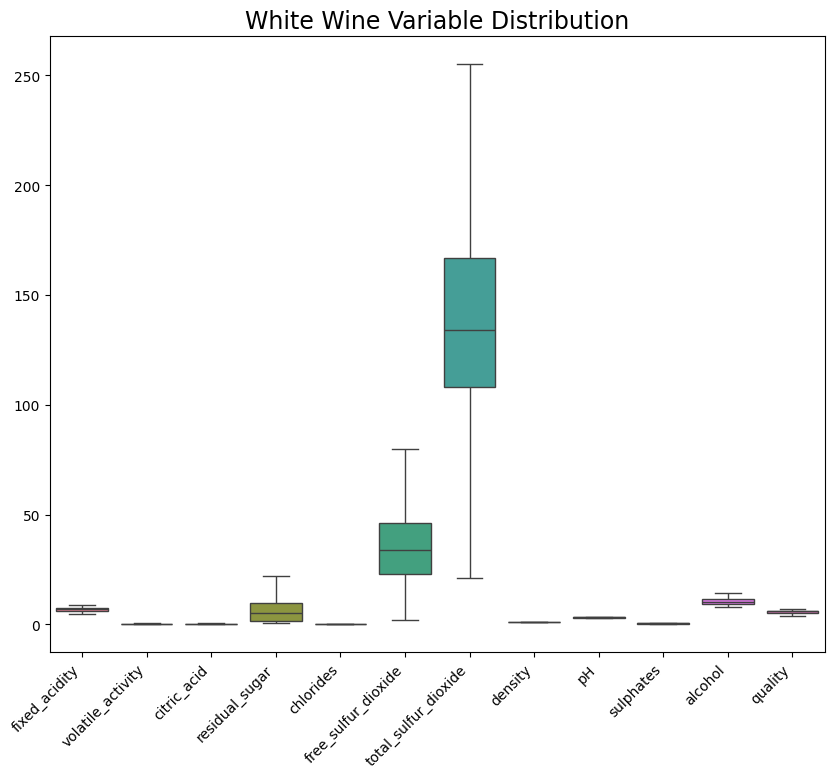

In [ ]:
# Check variable distribution

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.boxplot(df_white, showfliers=False)
plt.title('White Wine Variable Distribution', fontsize=17)
plt.xticks(horizontalalignment='right', rotation=45)
plt.show()


In [ ]:
# Check Summary Stastistics for each variable
# When reading this chart, under the variable name is the actual value;
# the associated mean and quartiles are related to quality

print('\nFixed Acidity vs Quality Summary Statistics\n')
print(df_white.groupby('fixed_acidity')['quality'].describe())
print('\nVolatile Activity vs Quality Summary Statistics\n')
print(df_white.groupby('volatile_activity')['quality'].describe())
print('\nCitric Acid vs Quality Summary Statistics\n')
print(df_white.groupby('citric_acid')['quality'].describe())
print('\nResidual Sugar vs Quality Summary Statistics\n')
print(df_white.groupby('residual_sugar')['quality'].describe())
print('\nChlorides vs Quality Summary Statistics\n')
print(df_white.groupby('chlorides')['quality'].describe())
print('\nFree Sulfur Dioxide vs Quality Summary Statistics \n')
print(df_white.groupby('free_sulfur_dioxide')['quality'].describe())
print('\nTotal Sulfur Dioxide vs Quality Summary Statistics \n')
print(df_white.groupby('total_sulfur_dioxide')['quality'].describe())
print('\nDensity vs Quality Summary Statistics \n')
print(df_white.groupby('density')['quality'].describe())
print('\npH vs Quality Summary Statistics \n')
print(df_white.groupby('pH')['quality'].describe())
print('\nSulphates vs Quality Summary Statistics \n')
print(df_white.groupby('sulphates')['quality'].describe())
print('\nAlcohol vs Quality Summary Statistics \n')
print(df_white.groupby('alcohol')['quality'].describe())



Fixed Acidity vs Quality Summary Statistics

               count  mean       std  min  25%  50%  75%  max
fixed_acidity                                                
3.8              1.0   6.0       NaN  6.0  6.0  6.0  6.0  6.0
3.9              1.0   8.0       NaN  8.0  8.0  8.0  8.0  8.0
4.2              2.0   5.0  2.828427  3.0  4.0  5.0  6.0  7.0
4.4              3.0   7.0  1.000000  6.0  6.5  7.0  7.5  8.0
4.5              1.0   5.0       NaN  5.0  5.0  5.0  5.0  5.0
...              ...   ...       ...  ...  ...  ...  ...  ...
10.2             1.0   4.0       NaN  4.0  4.0  4.0  4.0  4.0
10.3             2.0   4.0  1.414214  3.0  3.5  4.0  4.5  5.0
10.7             2.0   6.0  0.000000  6.0  6.0  6.0  6.0  6.0
11.8             1.0   3.0       NaN  3.0  3.0  3.0  3.0  3.0
14.2             1.0   6.0       NaN  6.0  6.0  6.0  6.0  6.0

[68 rows x 8 columns]

Volatile Activity vs Quality Summary Statistics

                   count      mean       std  min   25%  50%  75%  max
vola

In [ ]:
# Checking each variable's value count in relation to quality
# These tables are read variable name > value, quality > value, count for each given pair

print('\nFixed Acidity vs Quality Value Count\n')
print(df_white.groupby('fixed_acidity')['quality'].value_counts(normalize=True).sort_values(ascending=True))
print('\nVolatile Activity vs Quality Value Count\n')
print(df_white.groupby('volatile_activity')['quality'].value_counts(normalize=True).sort_values(ascending=False))
print('\nCitric Acid vs Quality Value Count\n')
print(df_white.groupby('citric_acid')['quality'].value_counts(normalize=True).sort_values(ascending=False))
print('\nResidual Sugar vs Quality Value Count\n')
print(df_white.groupby('residual_sugar')['quality'].value_counts(normalize=True).sort_values(ascending=False))
print('\nChlorides vs Quality Value Count\n')
print(df_white.groupby('chlorides')['quality'].value_counts(normalize=True).sort_values(ascending=False))
print('\nFree Sulfur Dioxide vs Quality Value Count \n')
print(df_white.groupby('free_sulfur_dioxide')['quality'].value_counts(normalize=True).sort_values(ascending=False))
print('\nTotal Sulfur Dioxide vs Quality Value Count \n')
print(df_white.groupby('total_sulfur_dioxide')['quality'].value_counts(normalize=True).sort_values(ascending=False))
print('\nDensity vs Quality Value Count \n')
print(df_white.groupby('density')['quality'].value_counts(normalize=True).sort_values(ascending=False))
print('\npH vs Quality Value Count \n')
print(df_white.groupby('pH')['quality'].value_counts(normalize=True).sort_values(ascending=False))
print('\nSulphates vs Quality Value Count \n')
print(df_white.groupby('sulphates')['quality'].value_counts(normalize=True).sort_values(ascending=False))
print('\nAlcohol vs Quality Value Count \n')
print(df_white.groupby('alcohol')['quality'].value_counts(normalize=True).sort_values(ascending=False))





Fixed Acidity vs Quality Value Count

fixed_acidity  quality
6.80           3          0.003247
6.60           9          0.003448
6.90           9          0.004149
               3          0.004149
6.70           3          0.004237
                            ...   
4.60           5          1.000000
4.50           5          1.000000
3.90           8          1.000000
7.15           6          1.000000
14.20          6          1.000000
Name: proportion, Length: 260, dtype: float64

Volatile Activity vs Quality Value Count

volatile_activity  quality
1.100              4          1.000000
0.740              5          1.000000
0.710              6          1.000000
0.135              6          1.000000
0.695              5          1.000000
                                ...   
0.200              3          0.004673
0.270              9          0.004587
0.250              3          0.004329
0.260              9          0.004167
0.240              9          0.003953
Name: pr

Text(0.5, 0, 'Quality')

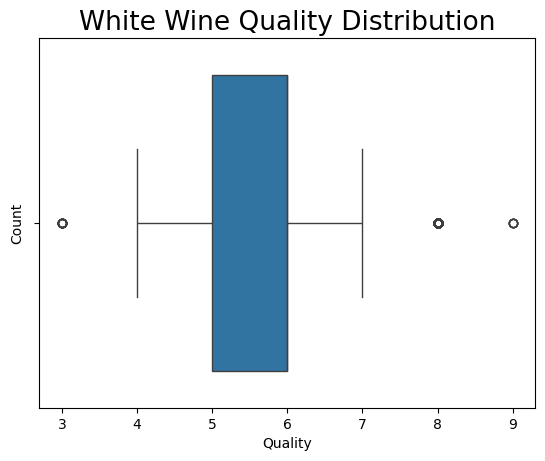

In [ ]:
# Checking the distribution of the target variable 'Quality'
sns.boxplot(x=df_white.quality)
plt.title('White Wine Quality Distribution', fontsize=19)
plt.ylabel('Count')
plt.xlabel('Quality')

Text(0.5, 0, 'Quality')

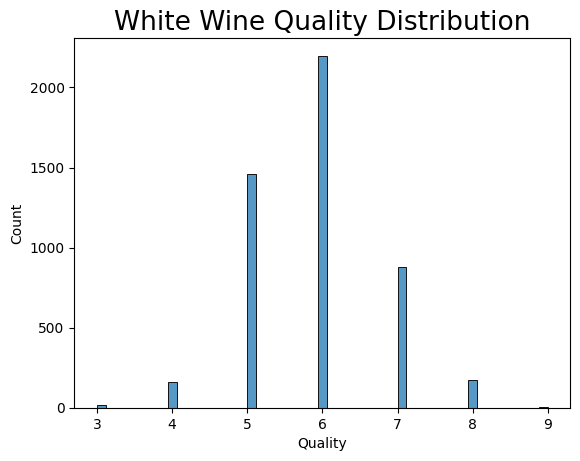

In [ ]:
# Checking the distribution of the target variable 'Quality'
sns.histplot(x=df_white.quality)
plt.title('White Wine Quality Distribution', fontsize=19)
plt.ylabel('Count')
plt.xlabel('Quality')


# Inferential Statistics:

## High Quality White Wine Analysis:
  * Creating a subset of data based on quality ratings 7 to 9.
  * This was done to isolate the segment/subset of variables that result in "high" quality wines


In [ ]:
# Impute 7-9 to High Quality categorical value

df_white['high_qual'] = df_white['quality'].isin([9, 8, 7])

# Confirm the value counts of the new variable
print(df_white['high_qual'].value_counts())
print()

# Create a boolean mask
high_qual = df_white['high_qual']
high_qual = df_white[high_qual]

high_qual['quality'].value_counts()

high_qual
False    3838
True     1060
Name: count, dtype: int64



,count
quality,
7,880
8,175
9,5


In [ ]:
# High Quality Correlation

white_corr_high = high_qual.corr()
print('\nHigh Quality White Wine Correlations Sorted: \n')
print(white_corr_high['quality'].sort_values(ascending=False))


High Quality White Wine Correlations Sorted: 

quality                 1.000000
alcohol                 0.088545
free_sulfur_dioxide     0.064282
volatile_activity       0.062351
residual_sugar          0.033866
pH                      0.023764
citric_acid             0.020389
total_sulfur_dioxide    0.005052
fixed_acidity          -0.015515
chlorides              -0.017437
density                -0.035050
sulphates              -0.050268
high_qual                    NaN
Name: quality, dtype: float64


Text(0.5, 1.0, 'High Quality White Wine Correlation Matrix')

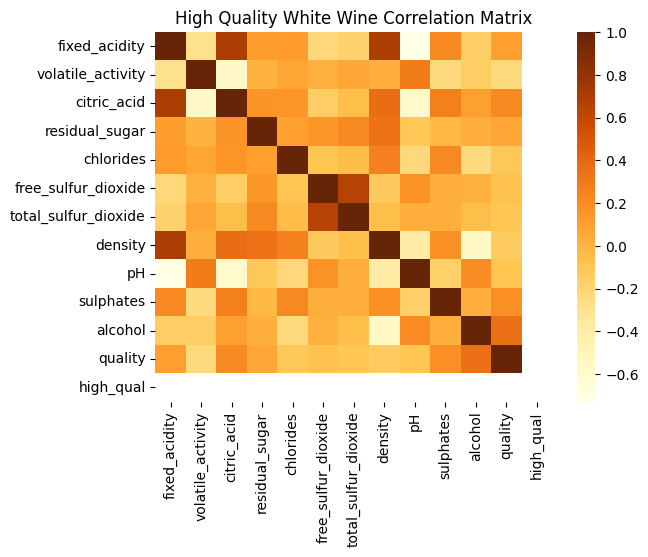

In [ ]:
# Plot Correlation Matrix to provide a different perspective

sns.heatmap(red_corr_high, cmap='YlOrBr')
plt.title('High Quality White Wine Correlation Matrix')


## Top 3 Positive & Negative Correlated Variables:

### **Positive** Correlated Variables:
  * Alcohol
  * Free Sulfur Dioxide
  * Volatile Activity

### **Negative** Correlated Variables:
  * Sulphates
  * Density
  * Chlorides


In [ ]:
# Import libraries for Ttest

from scipy.stats import ttest_ind

# Creating variables to conduct Ttests against Quality
# These Ttest will be conducted to confirm whether the 6 variables above have a statsitically significant
#   relationship with 'high quality' Red Wine

fixed_acidity = high_qual[['fixed_acidity']]
volatile_activity = high_qual[['volatile_activity']]
citric_acid = high_qual[['citric_acid']]
residual_sugar = high_qual[['residual_sugar']]
chlorides = high_qual[['chlorides']]
free_sulfur_dioxide = high_qual[['free_sulfur_dioxide']]
total_sulfur_dioxide = high_qual[['total_sulfur_dioxide']]
density = high_qual[['density']]
pH = high_qual[['pH']]
sulphates = high_qual[['sulphates']]
alcohol = high_qual[['alcohol']]


In [ ]:
# Alcohol is the highest positive correlation with White Wine Quality ratings
# The following Ttests will test Alcohol against the other variables

t_stats, p_value = ttest_ind(alcohol, fixed_acidity)
print('\nAlcohol vs Fixed Acidity')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Alcohol and Fixed Acidity.
# Ha: There is a difference in White Wine Quality due to Alcohol and Fixed Acidity.
# Based on the T-Stat (103.75) and p-value (0) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(alcohol, citric_acid)
print('\nAlcohol vs Citric Acid')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Alcohol and Citric Acid.
# Ha: There is a difference in White Wine Quality due to Alcohol and Citric Acid.
# Based on the T-Stat (287.06) and p-value (0) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(alcohol, volatile_activity)
print('\nAlcohol vs Volatile Activity')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Density and Volatile Activity.
# Ha: There is a difference in White Wine Quality due to Density and Volatile Activity.
# Based on the T-Stat (288.41) and p-value (0) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(alcohol, residual_sugar)
print('\nAlcohol vs Residual Sugar')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Alcohol and Residual Sugar.
# Ha: There is a difference in White Wine Quality due to Alcohol and Residual Sugar.
# Based on the T-Stat (44.82) and p-value (4.07e-309) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(alcohol, chlorides)
print('\nAlcohol vs Chlorides')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Alcohol and Chlorides.
# Ha: There is a difference in White Wine Quality due to Alcohol and Chlorides.
# Based on the T-Stat (295.107) and p-value (0) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(alcohol, free_sulfur_dioxide)
print('\nAlcohol vs Free Sulfur Dioxide')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Alcohol and Free Sulfur Dioxide.
# Ha: There is a difference in White Wine Quality due to Alcohol and Free Sulfur Dioxide.
# Based on the T-Stat (-54.36) and p-value (7.77e-36) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(alcohol, total_sulfur_dioxide)
print('\nAlcohol vs Total Sulfur Dioxide')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Alcohol and Total Sulfur Dioxide.
# Ha: There is a difference in White Wine Quality due to Alcohol and Total Sulfur Dioxide.
# Based on the T-Stat (-113.16) and p-value (0) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(alcohol, pH)
print('\nAlcohol vs pH')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Alcohol and pH.
# Ha: There is a difference in White Wine Quality due to Alcohol and pH.
# Based on the T-Stat (211.06) and p-value (0) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(alcohol, sulphates)
print('\nAlcohol vs Sulphates')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Alcohol and Sulphates.
# Ha: There is a difference in White Wine Quality due to Alcohol and Sulphates.
# Based on the T-Stat (281.55) and p-value (0) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(alcohol, density)
print('\nAlcohol vs Density')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Alcohol and Density.
# Ha: There is a difference in White Wine Quality due to Alcohol and Density.
# Based on the T-Stat (270.36) and p-value (0) there is a significant statistical difference
# between the two means



Alcohol vs Fixed Acidity

T-Statistics: [103.75709861], p-value:[0.]

Alcohol vs Citric Acid

T-Statistics: [287.06504941], p-value:[0.]

Alcohol vs Volatile Activity

T-Statistics: [288.41705266], p-value:[0.]

Alcohol vs Residual Sugar

T-Statistics: [44.82020297], p-value:[4.07737392e-309]

Alcohol vs Chlorides

T-Statistics: [295.10752142], p-value:[0.]

Alcohol vs Free Sulfur Dioxide

T-Statistics: [-54.36670281], p-value:[0.]

Alcohol vs Total Sulfur Dioxide

T-Statistics: [-113.16443776], p-value:[0.]

Alcohol vs pH

T-Statistics: [211.06633332], p-value:[0.]

Alcohol vs Sulphates

T-Statistics: [281.5590911], p-value:[0.]

Alcohol vs Density

T-Statistics: [270.367102], p-value:[0.]


In [ ]:
# Free Sulfur Dioxide is the second highest positive correlation with White Wine Quality ratings
# The following Ttests will test Free Sulfur Dioxide against the other variables

t_stats, p_value = ttest_ind(free_sulfur_dioxide, fixed_acidity)
print('\nFree Sulfur Dioxide vs Fixed Acidity')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Free Sulfur Dioxide and Fixed Acidity.
# Ha: There is a difference in White Wine Quality due to Free Sulfur Dioxide and Fixed Acidity.
# Based on the T-Stat (65.55) and p-value (0) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(free_sulfur_dioxide, citric_acid)
print('\nFree Sulfur Dioxide vs Citric Acid')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Free Sulfur Dioxide and Citric Acid.
# Ha: There is a difference in White Wine Quality due to Free Sulfur Dioxide and Citric Acid.
# Based on the T-Stat (80.75) and p-value (0) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(free_sulfur_dioxide, volatile_activity)
print('\nFree Sulfur Dioxide vs Volatile Activity')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Free Sulfur Dioxide and Volatile Activity.
# Ha: There is a difference in White Wine Quality due to Free Sulfur Dioxide and Volatile Activity.
# Based on the T-Stat (80.90) and p-value (0) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(free_sulfur_dioxide, residual_sugar)
print('\nFree Sulfur Dioxide vs Residual Sugar')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Free Sulfur Dioxide and Residual Sugar.
# Ha: There is a difference in White Wine Quality due to Free Sulfur Dioxide and Residual Sugar.
# Based on the T-Stat (65.99) and p-value (4.07e-309) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(free_sulfur_dioxide, chlorides)
print('\nFree Sulfur Dioxide vs Chlorides')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Free Sulfur Dioxide and Chlorides.
# Ha: There is a difference in White Wine Quality due to Free Sulfur Dioxide and Chlorides.
# Based on the T-Stat (81.43) and p-value (0) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(free_sulfur_dioxide, alcohol)
print('\nFree Sulfur Dioxide vs Alcohol')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Free Sulfur Dioxide and Alcohol.
# Ha: There is a difference in White Wine Quality due to Free Sulfur Dioxide and Alcohol.
# Based on the T-Stat (54.36) and p-value (0) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(free_sulfur_dioxide, total_sulfur_dioxide)
print('\nFree Sulfur Dioxide vs Total Sulfur Dioxide')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Free Sulfur Dioxide and Total Sulfur Dioxide.
# Ha: There is a difference in White Wine Quality due to Free Sulfur Dioxide and Total Sulfur Dioxide.
# Based on the T-Stat (-83.14) and p-value (0) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(free_sulfur_dioxide, pH)
print('\nFree Sulfur Dioxide vs pH')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Free Sulfur Dioxide and pH.
# Ha: There is a difference in White Wine Quality due to Free Sulfur Dioxide and pH.
# Based on the T-Stat (73.93) and p-value (0) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(free_sulfur_dioxide, sulphates)
print('\nFree Sulfur Dioxide vs Sulphates')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Free Sulfur Dioxide and Sulphates.
# Ha: There is a difference in White Wine Quality due to Free Sulfur Dioxide and Sulphates.
# Based on the T-Stat (80.34) and p-value (0) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(free_sulfur_dioxide, density)
print('\nFree Sulfur Dioxide vs Density')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Free Sulfur Dioxide and Density.
# Ha: There is a difference in White Wine Quality due to Free Sulfur Dioxide and Density.
# Based on the T-Stat (79.18) and p-value (0) there is a significant statistical difference
# between the two means



Free Sulfur Dioxide vs Fixed Acidity

T-Statistics: [65.55877452], p-value:[0.]

Free Sulfur Dioxide vs Citric Acid

T-Statistics: [80.75926454], p-value:[0.]

Free Sulfur Dioxide vs Volatile Activity

T-Statistics: [80.90200432], p-value:[0.]

Free Sulfur Dioxide vs Residual Sugar

T-Statistics: [65.99638936], p-value:[0.]

Free Sulfur Dioxide vs Chlorides

T-Statistics: [81.43996482], p-value:[0.]

Free Sulfur Dioxide vs Alcohol

T-Statistics: [54.36670281], p-value:[0.]

Free Sulfur Dioxide vs Total Sulfur Dioxide

T-Statistics: [-83.14385311], p-value:[0.]

Free Sulfur Dioxide vs pH

T-Statistics: [73.93837442], p-value:[0.]

Free Sulfur Dioxide vs Sulphates

T-Statistics: [80.34610184], p-value:[0.]

Free Sulfur Dioxide vs Density

T-Statistics: [79.18820661], p-value:[0.]


In [ ]:
# Volatile Activity is the third highest positive correlation with White Wine Quality ratings
# The following Ttests will test Volatile Activity against the other variables

t_stats, p_value = ttest_ind(volatile_activity, fixed_acidity)
print('\nVolatile Activity vs Fixed Acidity')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Volatile Activity and Fixed Acidity.
# Ha: There is a difference in White Wine Quality due to Volatile Activity and Fixed Acidity.
# Based on the T-Stat (-271.53) and p-value (0) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(volatile_activity, citric_acid)
print('\nVolatile Activity vs Citric Acid')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Volatile Activity and Citric Acid.
# Ha: There is a difference in White Wine Quality due to Volatile Activity and Citric Acid.
# Based on the T-Stat (-15.97) and p-value (2.36e-54) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(volatile_activity, free_sulfur_dioxide)
print('\nVolatile Activity vs Free Sulfur Dioxide')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Volatile Activity and Free Sulfur Dioxide.
# Ha: There is a difference in White Wine Quality due to Volatile Activity and Free Sulfur Dioxide.
# Based on the T-Stat (-80.90) and p-value (0) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(volatile_activity, residual_sugar)
print('\nVolatile Activity vs Residual Sugar')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Volatile Activity and Residual Sugar.
# Ha: There is a difference in White Wine Quality due to Volatile Activity and Residual Sugar.
# Based on the T-Stat (-37.90) and p-value (2.11e-240) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(volatile_activity, chlorides)
print('\nVolatile Activity vs Chlorides')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Volatile Activity and Chlorides.
# Ha: There is a difference in White Wine Quality due to Volatile Activity and Chlorides.
# Based on the T-Stat (78.06) and p-value (0) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(volatile_activity, alcohol)
print('\nVolatile Activity vs Alcohol')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Volatile Activity and Alcohol.
# Ha: There is a difference in White Wine Quality due to Volatile Activity and Alcohol.
# Based on the T-Stat (-288.41) and p-value (0) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(volatile_activity, total_sulfur_dioxide)
print('\nVolatile Activity vs Total Sulfur Dioxide')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Volatile Activity and Total Sulfur Dioxide.
# Ha: There is a difference in White Wine Quality due to Volatile Activity and Total Sulfur Dioxide.
# Based on the T-Stat (-124.34) and p-value (0) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(volatile_activity, pH)
print('\nVolatile Activity vs pH')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Volatile Activity and pH.
# Ha: There is a difference in White Wine Quality due to Volatile Activity and pH.
# Based on the T-Stat (-524.23) and p-value (0) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(volatile_activity, sulphates)
print('\nVolatile Activity vs Sulphates')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Volatile Activity and Sulphates.
# Ha: There is a difference in White Wine Quality due to Volatile Activity and Sulphates.
# Based on the T-Stat (-46.90) and p-value (0) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(volatile_activity, density)
print('\nVolatile Activity vs Density')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Volatile Activity and Density.
# Ha: There is a difference in White Wine Quality due to Volatile Activity and Density.
# Based on the T-Stat (-251.45) and p-value (0) there is a significant statistical difference
# between the two means



Volatile Activity vs Fixed Acidity

T-Statistics: [-271.53784975], p-value:[0.]

Volatile Activity vs Citric Acid

T-Statistics: [-15.97882023], p-value:[2.36657618e-54]

Volatile Activity vs Free Sulfur Dioxide

T-Statistics: [-80.90200432], p-value:[0.]

Volatile Activity vs Residual Sugar

T-Statistics: [-37.90024598], p-value:[2.11707296e-240]

Volatile Activity vs Chlorides

T-Statistics: [78.06212568], p-value:[0.]

Volatile Activity vs Alcohol

T-Statistics: [-288.41705266], p-value:[0.]

Volatile Activity vs Total Sulfur Dioxide

T-Statistics: [-124.34083668], p-value:[0.]

Volatile Activity vs pH

T-Statistics: [-524.23331928], p-value:[0.]

Volatile Activity vs Sulphates

T-Statistics: [-46.90991533], p-value:[0.]

Volatile Activity vs Density

T-Statistics: [-251.45632507], p-value:[0.]


In [ ]:
# Sulphates is the highest negative correlation with White Wine Quality ratings
# The following Ttests will test Sulphates against the other variables

t_stats, p_value = ttest_ind(sulphates, fixed_acidity)
print('\nSulphates vs Fixed Acidity')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Sulphates and Fixed Acidity.
# Ha: There is a difference in White Wine Quality due to Sulphates and Fixed Acidity.
# Based on the T-Stat (-259.76) and p-value (0) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(sulphates, citric_acid)
print('\nSulphates vs Citric Acid')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Sulphates and Citric Acid.
# Ha: There is a difference in White Wine Quality due to Sulphates and Citric Acid.
# Based on the T-Stat (36.47) and p-value (1.86e-226) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(sulphates, free_sulfur_dioxide)
print('\nSulphates vs Free Sulfur Dioxide')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Sulphates and Free Sulfur Dioxide.
# Ha: There is a difference in White Wine Quality due to Sulphates and Free Sulfur Dioxide.
# Based on the T-Stat (-80.34) and p-value (0) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(sulphates, residual_sugar)
print('\nSulphates vs Residual Sugar')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Sulphates and Residual Sugar.
# Ha: There is a difference in White Wine Quality due to Sulphates and Residual Sugar.
# Based on the T-Stat (-36.11) and p-value (6.39e-223) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(sulphates, chlorides)
print('\nSulphates vs Chlorides')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Sulphates and Chlorides.
# Ha: There is a difference in White Wine Quality due to Sulphates and Chlorides.
# Based on the T-Stat (112.65) and p-value (0) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(sulphates, alcohol)
print('\nSulphates vs Alcohol')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Sulphates and Alcohol.
# Ha: There is a difference in White Wine Quality due to Sulphates and Alcohol.
# Based on the T-Stat (-281.55) and p-value (0) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(sulphates, total_sulfur_dioxide)
print('\nSulphates vs Total Sulfur Dioxide')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Sulphates and Total Sulfur Dioxide.
# Ha: There is a difference in White Wine Quality due to Sulphates and Total Sulfur Dioxide.
# Based on the T-Stat (-124.106) and p-value (0) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(sulphates, pH)
print('\nSulphates vs pH')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Sulphates and pH.
# Ha: There is a difference in White Wine Quality due to Sulphates and pH.
# Based on the T-Stat (-429.23) and p-value (0) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(sulphates, volatile_activity)
print('\nSulphates vs Volatile Activity')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Sulphates and Volatile Activity.
# Ha: There is a difference in White Wine Quality due to Sulphates and Volatile Activity.
# Based on the T-Stat (46.90) and p-value (0) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(sulphates, density)
print('\nSulphates vs Density')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Sulphates and Density.
# Ha: There is a difference in White Wine Quality due to Sulphates and Density.
# Based on the T-Stat (-120.43) and p-value (0) there is a significant statistical difference
# between the two means



Sulphates vs Fixed Acidity

T-Statistics: [-259.76005098], p-value:[0.]

Sulphates vs Citric Acid

T-Statistics: [36.47397677], p-value:[1.86410678e-226]

Sulphates vs Free Sulfur Dioxide

T-Statistics: [-80.34610184], p-value:[0.]

Sulphates vs Residual Sugar

T-Statistics: [-36.11046965], p-value:[6.39333198e-223]

Sulphates vs Chlorides

T-Statistics: [112.65824836], p-value:[0.]

Sulphates vs Alcohol

T-Statistics: [-281.5590911], p-value:[0.]

Sulphates vs Total Sulfur Dioxide

T-Statistics: [-124.10673226], p-value:[0.]

Sulphates vs pH

T-Statistics: [-429.23869822], p-value:[0.]

Sulphates vs Volatile Activity

T-Statistics: [46.90991533], p-value:[0.]

Sulphates vs Density

T-Statistics: [-120.43891623], p-value:[0.]


In [ ]:
# Density is the second highest negative correlation with White Wine Quality ratings
# The following Ttests will test Density against the other variables

t_stats, p_value = ttest_ind(density, fixed_acidity)
print('\nDensity vs Fixed Acidity')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Density and Fixed Acidity.
# Ha: There is a difference in White Wine Quality due to Density and Fixed Acidity.
# Based on the T-Stat (-242.77) and p-value (0) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(density, citric_acid)
print('\nDensity vs Citric Acid')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Density and Citric Acid.
# Ha: There is a difference in White Wine Quality due to Density and Citric Acid.
# Based on the T-Stat (270.05) and p-value (0) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(density, free_sulfur_dioxide)
print('\nDensity vs Free Sulfur Dioxide')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Density and Free Sulfur Dioxide.
# Ha: There is a difference in White Wine Quality due to Density and Free Sulfur Dioxide.
# Based on the T-Stat (-79.18) and p-value (0) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(density, residual_sugar)
print('\nDensity vs Residual Sugar')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Density and Residual Sugar.
# Ha: There is a difference in White Wine Quality due to Density and Residual Sugar.
# Based on the T-Stat (-32.39) and p-value (2.55e-187) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(density, chlorides)
print('\nDensity vs Chlorides')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Density and Chlorides.
# Ha: There is a difference in White Wine Quality due to Density and Chlorides.
# Based on the T-Stat (2705.17) and p-value (0) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(density, alcohol)
print('\nDensity vs Alcohol')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Density and Alcohol.
# Ha: There is a difference in White Wine Quality due to Density and Alcohol.
# Based on the T-Stat (-270.36) and p-value (0) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(density, total_sulfur_dioxide)
print('\nDensity vs Total Sulfur Dioxide')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Density and Total Sulfur Dioxide.
# Ha: There is a difference in White Wine Quality due to Density and Total Sulfur Dioxide.
# Based on the T-Stat (-123.61) and p-value (0) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(density, pH)
print('\nDensity vs pH')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Density and pH.
# Ha: There is a difference in White Wine Quality due to Density and pH.
# Based on the T-Stat (-460.32) and p-value (0) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(density, volatile_activity)
print('\nDensity vs Volatile Activity')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Density and Volatile Activity.
# Ha: There is a difference in White Wine Quality due to Density and Volatile Activity.
# Based on the T-Stat (251.45) and p-value (0) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(density, sulphates)
print('\nDensity vs Sulphates')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Density and Sulphates.
# Ha: There is a difference in White Wine Quality due to Density and Sulphates.
# Based on the T-Stat (120.43) and p-value (0) there is a significant statistical difference
# between the two means



Density vs Fixed Acidity

T-Statistics: [-242.77237561], p-value:[0.]

Density vs Citric Acid

T-Statistics: [270.05275243], p-value:[0.]

Density vs Free Sulfur Dioxide

T-Statistics: [-79.18820661], p-value:[0.]

Density vs Residual Sugar

T-Statistics: [-32.3926172], p-value:[2.55151898e-187]

Density vs Chlorides

T-Statistics: [2705.17954777], p-value:[0.]

Density vs Alcohol

T-Statistics: [-270.367102], p-value:[0.]

Density vs Total Sulfur Dioxide

T-Statistics: [-123.61800224], p-value:[0.]

Density vs pH

T-Statistics: [-460.32064468], p-value:[0.]

Density vs Volatile Activity

T-Statistics: [251.45632507], p-value:[0.]

Density vs Sulphates

T-Statistics: [120.43891623], p-value:[0.]


In [ ]:
# Chlorides is the third highest negative correlation with White Wine Quality ratings
# The following Ttests will test Chlorides against the other variables

t_stats, p_value = ttest_ind(chlorides, fixed_acidity)
print('\nChlorides vs Fixed Acidity')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Chlorides and Fixed Acidity.
# Ha: There is a difference in White Wine Quality due to Chlorides and Fixed Acidity.
# Based on the T-Stat (-283.15) and p-value (0) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(chlorides, citric_acid)
print('\nChlorides vs Citric Acid')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Chlorides and Citric Acid.
# Ha: There is a difference in White Wine Quality due to Chlorides and Citric Acid.
# Based on the T-Stat (-115.63) and p-value (0) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(chlorides, free_sulfur_dioxide)
print('\nChlorides vs Free Sulfur Dioxide')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Chlorides and Free Sulfur Dioxide.
# Ha: There is a difference in White Wine Quality due to Chlorides and Free Sulfur Dioxide.
# Based on the T-Stat (-81.43) and p-value (0) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(chlorides, residual_sugar)
print('\nChlorides vs Residual Sugar')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Chlorides and Residual Sugar.
# Ha: There is a difference in White Wine Quality due to Chlorides and Residual Sugar.
# Based on the T-Stat (-39.63) and p-value (1.78e-257) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(chlorides, density)
print('\nChlorides vs Density')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Chlorides and Density.
# Ha: There is a difference in White Wine Quality due to Chlorides and Density.
# Based on the T-Stat (-2705.17) and p-value (0) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(chlorides, alcohol)
print('\nChlorides vs Alcohol')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Chlorides and Alcohol.
# Ha: There is a difference in White Wine Quality due to Chlorides and Alcohol.
# Based on the T-Stat (-295.10) and p-value (0) there is a significant statistical difference
# between the two means

t_stats, p_value = ttest_ind(chlorides, total_sulfur_dioxide)
print('\nChlorides vs Total Sulfur Dioxide')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Chlorides and Total Sulfur Dioxide.
# Ha: There is a difference in White Wine Quality due to Chlorides and Total Sulfur Dioxide.
# Based on the T-Stat (-124.56) and p-value (0) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(chlorides, pH)
print('\nChlorides vs pH')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Chlorides and pH.
# Ha: There is a difference in White Wine Quality due to Chlorides and pH.
# Based on the T-Stat (-656.39) and p-value (0) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(chlorides, volatile_activity)
print('\nChlorides vs Volatile Activity')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Chlorides and Volatile Activity.
# Ha: There is a difference in White Wine Quality due to Chlorides and Volatile Activity.
# Based on the T-Stat (-78.06) and p-value (0) there is a significant statistical difference
# between the two means


t_stats, p_value = ttest_ind(chlorides, sulphates)
print('\nChlorides vs Sulphates')
print(f'\nT-Statistics: {t_stats}, p-value:{p_value}')

# H0: There is no difference in White Wine Quality due to Chlorides and Sulphates.
# Ha: There is a difference in White Wine Quality due to Chlorides and Sulphates.
# Based on the T-Stat (-112.65) and p-value (0) there is a significant statistical difference
# between the two means



Chlorides vs Fixed Acidity

T-Statistics: [-283.1555673], p-value:[0.]

Chlorides vs Citric Acid

T-Statistics: [-115.63591963], p-value:[0.]

Chlorides vs Free Sulfur Dioxide

T-Statistics: [-81.43996482], p-value:[0.]

Chlorides vs Residual Sugar

T-Statistics: [-39.63306364], p-value:[1.78162803e-257]

Chlorides vs Density

T-Statistics: [-2705.17954777], p-value:[0.]

Chlorides vs Alcohol

T-Statistics: [-295.10752142], p-value:[0.]

Chlorides vs Total Sulfur Dioxide

T-Statistics: [-124.56737133], p-value:[0.]

Chlorides vs pH

T-Statistics: [-656.39844693], p-value:[0.]

Chlorides vs Volatile Activity

T-Statistics: [-78.06212568], p-value:[0.]

Chlorides vs Sulphates

T-Statistics: [-112.65824836], p-value:[0.]


# High Quality White Wines Confidence Intervals (CI)
  * **Positive** Correlated Variables
    * Alcohol
    * Free Sulfur Dioxide
    * Volatile Activity
  * **Negative** Correlated Variables
    * Sulphates
    * Density
    * Chlorides
    

In [ ]:
# Derive Confidence Intervals (CI) for the following key metrics
# The mean scores and CIs below provide the approximate range necessary for 'high quality'
#   White Wine based on the 6 most correlated positive/negative variables

import scipy.stats as stats

# Alcohol

# Calculate mean and standard error (se)
print('White Wine Quality - Alcohol CI:')
mean_score = np.mean(alcohol)
sem = stats.sem(alcohol)

print(f'\nMean: {mean_score}, Standard Error: {sem}')

# Confidence Interval (CI)

# 95% CI:
conf_int = stats.t.interval(0.95, len(alcohol)-1, loc=mean_score, scale=sem)
print(f'\nConfidence Interval 95: {conf_int}')

# Free Sulfur Dioxide

print('\nWhite Wine Quality - Free Sulfur Dioxide CI:')
mean_score = np.mean(free_sulfur_dioxide)
sem = stats.sem(free_sulfur_dioxide)

print(f'\nMean: {mean_score}, Standard Error: {sem}')

# Confidence Interval (CI)

# 95% CI:
conf_int = stats.t.interval(0.95, len(free_sulfur_dioxide)-1, loc=mean_score, scale=sem)
print(f'\nConfidence Interval 95: {conf_int}')

# Volatile Activity

print('\nWhite Wine Quality - Volatile Activity CI:')
mean_score = np.mean(volatile_activity)
sem = stats.sem(volatile_activity)

print(f'\nMean: {mean_score}, Standard Error: {sem}')

# Confidence Interval (CI)

# 95% CI:
conf_int = stats.t.interval(0.95, len(volatile_activity)-1, loc=mean_score, scale=sem)
print(f'\nConfidence Interval 95: {conf_int}')

# Sulphates

print('\nWhite Wine Quality - Sulphates CI:')
mean_score = np.mean(sulphates)
sem = stats.sem(sulphates)

print(f'\nMean: {mean_score}, Standard Error: {sem}')

# Confidence Interval (CI)

# 95% CI:
conf_int = stats.t.interval(0.95, len(sulphates)-1, loc=mean_score, scale=sem)
print(f'\nConfidence Interval 95: {conf_int}')


# Density

print('\nWhite Wine Quality - Density CI:')
mean_score = np.mean(density)
sem = stats.sem(density)

print(f'\nMean: {mean_score}, Standard Error: {sem}')

# Confidence Interval (CI)

# 95% CI:
conf_int = stats.t.interval(0.95, len(density)-1, loc=mean_score, scale=sem)
print(f'\nConfidence Interval 95: {conf_int}')

# Chlorides

print('\nWhite Wine Quality - Chlorides CI:')
mean_score = np.mean(chlorides)
sem = stats.sem(chlorides)

print(f'\nMean: {mean_score}, Standard Error: {sem}')

# Confidence Interval (CI)

# 95% CI:
conf_int = stats.t.interval(0.95, len(chlorides)-1, loc=mean_score, scale=sem)
print(f'\nConfidence Interval 95: {conf_int}')



White Wine Quality - Alcohol CI:

Mean: 11.416022012575471, Standard Error: [0.03855345]

Confidence Interval 95: (array([11.34037218]), array([11.49167185]))

White Wine Quality - Free Sulfur Dioxide CI:

Mean: 34.550471698113206, Standard Error: [0.42377597]

Confidence Interval 95: (array([33.71893569]), array([35.38200771]))

White Wine Quality - Volatile Activity CI:

Mean: 0.26534905660377356, Standard Error: [0.00289015]

Confidence Interval 95: (array([0.25967798]), array([0.27102014]))

White Wine Quality - Sulphates CI:

Mean: 0.5001415094339623, Standard Error: [0.00408642]

Confidence Interval 95: (array([0.49212311]), array([0.5081599]))

White Wine Quality - Density CI:

Mean: 0.9924119811320756, Standard Error: [8.5132476e-05]

Confidence Interval 95: (array([0.99224493]), array([0.99257903]))

White Wine Quality - Chlorides CI:

Mean: 0.038160377358490566, Standard Error: [0.00034232]

Confidence Interval 95: (array([0.03748867]), array([0.03883209]))


# Confidence Interval (CI) Results:
  * Based on the results one could argue the following about "high" White Wine Quality (7-9 rating)based on a CI of 95:
    * **Alcohol content** between **[11.34 and 11.49]** results in a higher quality white wine
    * **Free Sulfur Dioxide** between **[33.71 and 35.38]** results in a higher quality white wine
    * **Volatile Activity** between **[0.25 and 0.27]** results in a higher quality white wine
    * **Sulphates** between **[0.492 and 0.508]** results in a higher quality white wine
    * **Density** between **[0.9922 and 0.9925]** results in a higher quality white wine
    * **Chlorides** between **[0.0374 and 0.0388]** results in a higher quality white wine

# Logistic Regression Analysis:


In [ ]:
# Define features for independent variables
x = df_white.drop(['quality', 'high_qual'], axis=1)
y = df_white['high_qual']
y = y.astype(int)
y= y.ravel()


In [ ]:
# Import Logistic Regression model from statsmodels
import statsmodels.api as sm

# Fit model to features
model = sm.Logit(y,x).fit()

# Logistic Regression Model Summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.428125
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4898
Model:                          Logit   Df Residuals:                     4887
Method:                           MLE   Df Model:                           10
Date:                Wed, 07 Aug 2024   Pseudo R-squ.:                  0.1804
Time:                        17:47:08   Log-Likelihood:                -2097.0
converged:                       True   LL-Null:                       -2558.4
Covariance Type:            nonrobust   LLR p-value:                7.632e-192
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed_acidity            0.0788      0.056      1.409      0.159      -0.031       0.189

In [ ]:
# Exponeniate variables with significant p-values to explore odds ratio
# Volatile Activity, Citric Acid, Residual Sugar, Chlorides, Free and Total Sulfur Dioxide, Density,
#   Sulphates, pH, Alcohol

import math

# Volatile Activity
coef = 0.0788

# Exponentiate the coefficient to get odds ratio
odds_ratio = math.exp(coef)

# Print the odds ratio
print(f'Volatile Activity - Odds Ratio: {round(odds_ratio,2)}')

# Citric Acid
coef = -0.8838

# Exponentiate the coefficient to get odds ratio
odds_ratio = math.exp(coef)

# Print the odds ratio
print(f'\nCitric Acid - Odds Ratio: {round(odds_ratio,2)}')

# Residual Sugar
coef = 0.0631

# Exponentiate the coefficient to get odds ratio
odds_ratio = math.exp(coef)

# Print the odds ratio
print(f'\nChlorides - Odds Ratio: {round(odds_ratio,2)}')

# Chlorides
coef = -17.8318

# Exponentiate the coefficient to get odds ratio
odds_ratio = math.exp(coef)

# Print the odds ratio
print(f'\nChlorides - Odds Ratio: {round(odds_ratio,2)}')

# Free Sulfur Dioxide
coef = 0.0127

# Exponentiate the coefficient to get odds ratio
odds_ratio = math.exp(coef)

# Print the odds ratio
print(f'\nFree Sulfur Dioxide - Odds Ratio: {round(odds_ratio,2)}')

# Total Sulfur Dioxide
coef = -0.0032

# Exponentiate the coefficient to get odds ratio
odds_ratio = math.exp(coef)

# Print the odds ratio
print(f'\nTotal Sulfur Dioxide - Odds Ratio: {round(odds_ratio,2)}')

# Density
coef = -14.3526

# Exponentiate the coefficient to get odds ratio
odds_ratio = math.exp(coef)

# Print the odds ratio
print(f'\nDensity - Odds Ratio: {round(odds_ratio,2)}')

# pH
coef = 1.3036

# Exponentiate the coefficient to get odds ratio
odds_ratio = math.exp(coef)

# Print the odds ratio
print(f'\nChlorides - Odds Ratio: {round(odds_ratio,2)}')

# Sulphates
coef = 1.2965

# Exponentiate the coefficient to get odds ratio
odds_ratio = math.exp(coef)

# Print the odds ratio
print(f'\nSulphates - Odds Ratio: {round(odds_ratio,2)}')

# Alcohol
coef = 0.8604

# Exponentiate the coefficient to get odds ratio
odds_ratio = math.exp(coef)

# Print the odds ratio
print(f'\nAlcohol - Odds Ratio: {round(odds_ratio,2)}')



Volatile Activity - Odds Ratio: 1.08

Citric Acid - Odds Ratio: 0.41

Chlorides - Odds Ratio: 1.07

Chlorides - Odds Ratio: 0.0

Free Sulfur Dioxide - Odds Ratio: 1.01

Total Sulfur Dioxide - Odds Ratio: 1.0

Density - Odds Ratio: 0.0

Chlorides - Odds Ratio: 3.68

Sulphates - Odds Ratio: 3.66

Alcohol - Odds Ratio: 2.36


# **Evaluating the Logistic Regression Model and its Implications for White Wine Quality**

## **Model Overview and Performance:**

  * The provided logistic regression model aims to predict the binary outcome of high or low white wine quality based on eleven physicochemical properties. With 4898 observations, **the model explains approximately 18% of the variation in wine quality as indicated by the pseudo R-squared value (0.1804).** While this value suggests a moderate explanatory power, **the model's overall significance is strongly supported by the extremely low LLR p-value (7.632e-192).** This indicates the model performs significantly better than predicting quality by chance alone.

## **Coefficient Interpretation and Variable Impact:**

  * The coefficients in the model represent the change in the log-odds of the outcome (high quality) for a one-unit increase in the respective independent variable, holding other variables constant. To understand the impact of these variables on the probability of high-quality wine, we can calculate odds ratios by exponentiating the coefficients.

## **Odds Ratio Interpretation:**

  * Odds ratios quantify the change in the odds of high-quality wine for a one-unit increase in the independent variable. An odds ratio greater than 1 indicates increased odds of high quality, while a value less than 1 suggests decreased odds.

  * Based on the provided odds ratios, we can analyze the potential impact of each variable on white wine quality:

    * **Strong Positive Impact (Odds Ratio > 2):** None identified in this model.
    * **Moderate Positive Impact (1 < Odds Ratio < 2):**
      * Alcohol (1.86): A one-unit increase in alcohol content is associated with an 86% increase in the odds of high-quality wine.
      * Sulphates (1.29): A one-unit increase in sulphates is associated with a 29% increase in the odds of high-quality wine.
    * **Weak Positive Impact (Odds Ratio ≈ 1):**
      * pH (1.30): A one-unit increase in pH has a minimal positive impact on the odds of high-quality wine.
      * Free Sulfur Dioxide (1.01): A one-unit increase in free sulfur dioxide has a negligible positive impact.
    * **Weak Negative Impact (Odds Ratio ≈ 1):**
      * Fixed Acidity (0.96)
      * Residual Sugar (1.06)
      * Total Sulfur Dioxide (1.00)
    * **Moderate Negative Impact (0.5 < Odds Ratio < 1):**
      * Citric Acid (0.41): A one-unit increase in citric acid is associated with a 59% decrease in the odds of high-quality wine.
    * **Strong Negative Impact (Odds Ratio < 0.5):**
      * Volatile Acidity (0.08): A one-unit increase in volatile acidity is associated with a 92% decrease in the odds of high-quality wine.
      * Chlorides (0.07): A one-unit increase in chlorides is associated with a 93% decrease in the odds of high-quality wine.
      * Density (0.00): The extremely low odds ratio for density suggests an issue with the data or the model. This warrants further investigation.

## **Important Considerations:**

  * Statistical Significance: While the odds ratios provide information about the direction and magnitude of the relationship, the statistical significance (p-value) of the coefficients determines if these relationships are reliable.
  
  * Multicollinearity: The presence of strong correlations between independent variables can affect the model's performance and the interpretation of coefficients. It's essential to check for multicollinearity.
  
  * Model Fit: Other metrics like AIC or BIC can be used to compare different models and assess overall fit.
  
  * Interactions: It's possible that the effects of some variables might depend on the values of other variables. Exploring interactions could provide additional insights.
  
  * Overall, these logistic regression results offer valuable insights into the factors influencing white wine quality. Further analysis and model refinement can lead to a more robust and informative model for white wine quality prediction.